In [1]:
import numpy as np 
import time
import os

import torch 
import torch.nn as nn
import torch.nn.functional as F 

import matplotlib.pyplot as plt
from collections import OrderedDict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [2]:
from utils.inference import Trainer, plot_loss
from utils.models import DNN
import utils.datasets as d

In [3]:
X = np.vstack((np.load("data/sequenced_data_for_VAE_length-160_stride-10_pt1.npy"),
               np.load("data/sequenced_data_for_VAE_length-160_stride-10_pt2.npy")))
y = np.load("data/sequenced_data_for_VAE_length-160_stride-10_targets.npy")

In [4]:
print(X.shape, y.shape)

(83680, 160) (83680,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [6]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

# Hyperparameters search
## Batch size 100 + learning rate 1e-3 + Sigmoid

In [11]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

In [12]:
model1 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.Sigmoid(), dropout=False)

In [13]:
m1 = Trainer(
        model=model1,
        optimizer=torch.optim.Adam(model1.parameters(), lr=1e-3),
        loss_function=nn.CrossEntropyLoss(),
        verbose=True
        )

cuda:0


In [14]:
lh = m1(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.7270, validation_loss:0.5690
Epoch [2/200], average_loss:0.5491, validation_loss:0.5229
Epoch [3/200], average_loss:0.5216, validation_loss:0.5058
Epoch [4/200], average_loss:0.5050, validation_loss:0.4927
Epoch [5/200], average_loss:0.4914, validation_loss:0.4741
Epoch [6/200], average_loss:0.4805, validation_loss:0.4631
Epoch [7/200], average_loss:0.4718, validation_loss:0.4651
Epoch [8/200], average_loss:0.4661, validation_loss:0.4566
Epoch [9/200], average_loss:0.4592, validation_loss:0.4480
Epoch [10/200], average_loss:0.4548, validation_loss:0.4404
Epoch [11/200], average_loss:0.4500, validation_loss:0.4397
Epoch [12/200], average_loss:0.4471, validation_loss:0.4392
Epoch [13/200], average_loss:0.4450, validation_loss:0.4456
Epoch [14/200], average_loss:0.4400, validation_loss:0.4431
Epoch [15/200], average_loss:0.4372, validation_loss:0.4255
Epoch [16/200], average_loss:0.4344, validation_loss:0.4252
Epoch [17/200], average_loss:0.4309, validation_l

Epoch [138/200], average_loss:0.3082, validation_loss:0.3187
Epoch [139/200], average_loss:0.3069, validation_loss:0.3190
Epoch [140/200], average_loss:0.3067, validation_loss:0.3286
Epoch [141/200], average_loss:0.3053, validation_loss:0.3208
Epoch [142/200], average_loss:0.3078, validation_loss:0.3167
Epoch [143/200], average_loss:0.3042, validation_loss:0.3198
Epoch [144/200], average_loss:0.3034, validation_loss:0.3245
Epoch [145/200], average_loss:0.3016, validation_loss:0.3146
Epoch [146/200], average_loss:0.3020, validation_loss:0.3224
Epoch [147/200], average_loss:0.3006, validation_loss:0.3315
Epoch [148/200], average_loss:0.2991, validation_loss:0.3187
Epoch [149/200], average_loss:0.3001, validation_loss:0.3126
Epoch [150/200], average_loss:0.2974, validation_loss:0.3131
Epoch [151/200], average_loss:0.2960, validation_loss:0.3282
Epoch [152/200], average_loss:0.2949, validation_loss:0.3157
Epoch [153/200], average_loss:0.2943, validation_loss:0.3111
Epoch [154/200], average

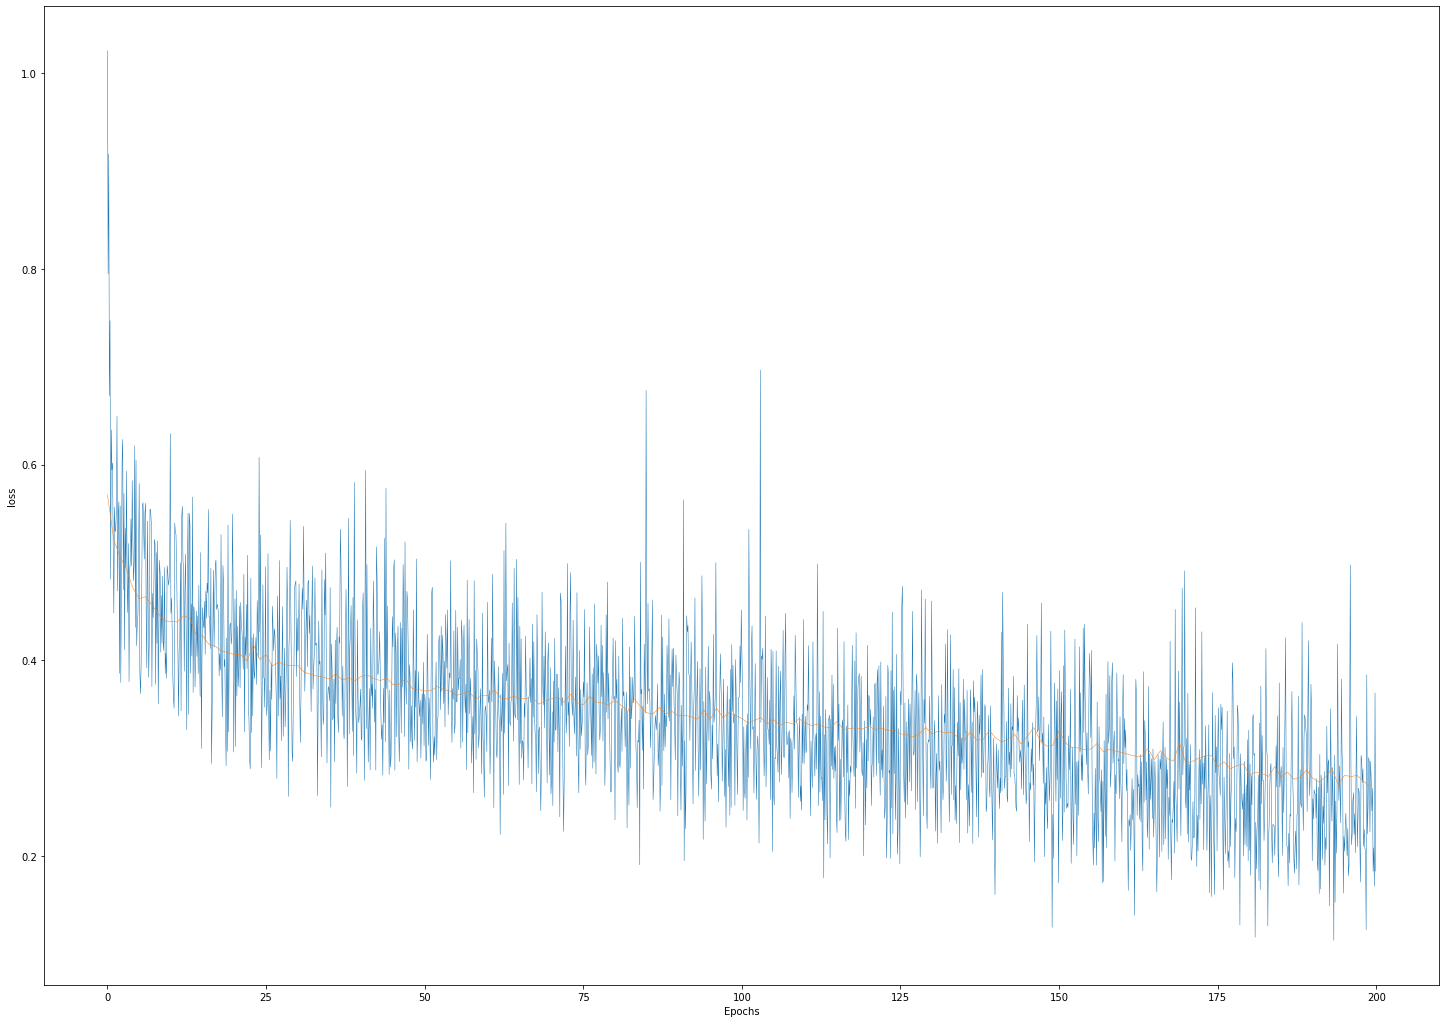

In [22]:
loss_train = m1.loss_history["train"]
axe_t = np.arange(len(loss_train))/10
loss_val = m1.loss_history["validation"]
axe_v = np.arange(len(loss_val))
plt.figure(figsize=(25,18))
plt.plot(axe_t, loss_train, lw=0.5)
plt.plot(axe_v, loss_val, lw=0.5)
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

## Batch size 300 + learning rate 1e-3 + Sigmoid

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [9]:
model2 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.Sigmoid(), dropout=False)

In [10]:
m2 = Trainer(
        model=model2,
        optimizer=torch.optim.Adam(model2.parameters(), lr=1e-3),
        loss_function=nn.CrossEntropyLoss(),
        verbose=True
        )

cuda:0


In [11]:
lh = m2(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.8584, validation_loss:0.7280
Epoch [2/200], average_loss:0.6474, validation_loss:0.5807
Epoch [3/200], average_loss:0.5660, validation_loss:0.5467
Epoch [4/200], average_loss:0.5385, validation_loss:0.5214
Epoch [5/200], average_loss:0.5216, validation_loss:0.5093
Epoch [6/200], average_loss:0.5097, validation_loss:0.5010
Epoch [7/200], average_loss:0.4995, validation_loss:0.4976
Epoch [8/200], average_loss:0.4937, validation_loss:0.4856
Epoch [9/200], average_loss:0.4854, validation_loss:0.4743
Epoch [10/200], average_loss:0.4765, validation_loss:0.4672
Epoch [11/200], average_loss:0.4717, validation_loss:0.4616
Epoch [12/200], average_loss:0.4675, validation_loss:0.4595
Epoch [13/200], average_loss:0.4641, validation_loss:0.4551
Epoch [14/200], average_loss:0.4598, validation_loss:0.4552
Epoch [15/200], average_loss:0.4580, validation_loss:0.4479
Epoch [16/200], average_loss:0.4545, validation_loss:0.4561
Epoch [17/200], average_loss:0.4528, validation_l

Epoch [138/200], average_loss:0.3554, validation_loss:0.3617
Epoch [139/200], average_loss:0.3544, validation_loss:0.3556
Epoch [140/200], average_loss:0.3537, validation_loss:0.3541
Epoch [141/200], average_loss:0.3528, validation_loss:0.3571
Epoch [142/200], average_loss:0.3535, validation_loss:0.3612
Epoch [143/200], average_loss:0.3535, validation_loss:0.3545
Epoch [144/200], average_loss:0.3535, validation_loss:0.3573
Epoch [145/200], average_loss:0.3508, validation_loss:0.3522
Epoch [146/200], average_loss:0.3511, validation_loss:0.3611
Epoch [147/200], average_loss:0.3516, validation_loss:0.3690
Epoch [148/200], average_loss:0.3514, validation_loss:0.3574
Epoch [149/200], average_loss:0.3509, validation_loss:0.3567
Epoch [150/200], average_loss:0.3509, validation_loss:0.3563
Epoch [151/200], average_loss:0.3509, validation_loss:0.3503
Epoch [152/200], average_loss:0.3496, validation_loss:0.3558
Epoch [153/200], average_loss:0.3476, validation_loss:0.3527
Epoch [154/200], average

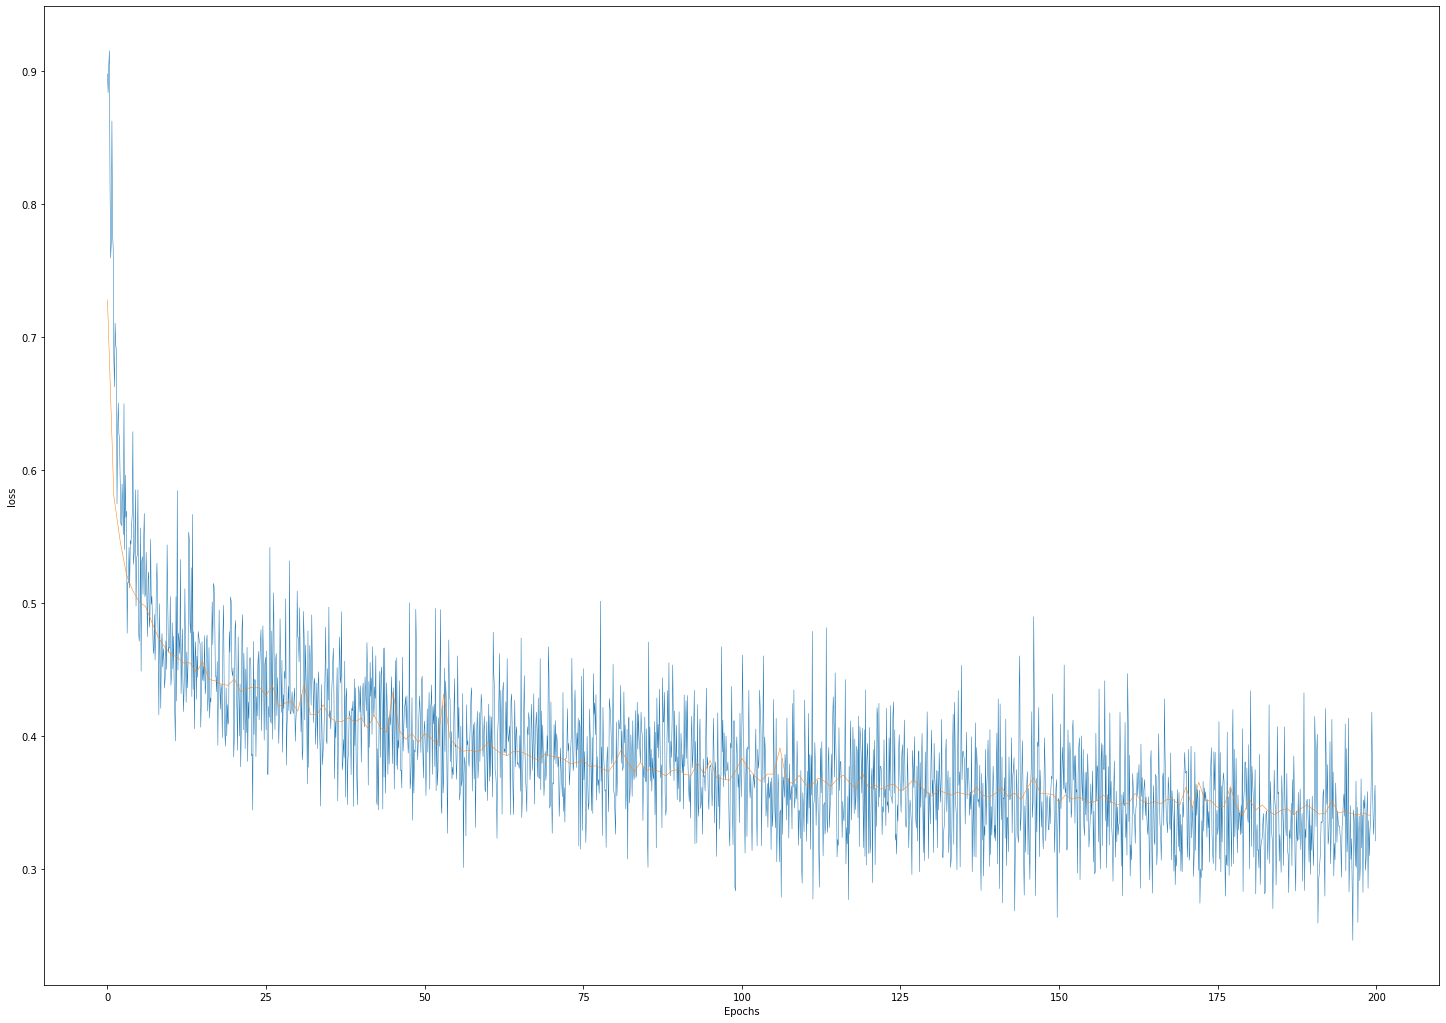

In [12]:
plot_loss(m2)

## Batch size 100 + learning rate 1e-4 + Sigmoid

In [13]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

In [14]:
model3 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.Sigmoid(), dropout=False)

In [15]:
m3 = Trainer(
        model=model3,
        optimizer=torch.optim.Adam(model3.parameters(), lr=1e-4),
        loss_function=nn.CrossEntropyLoss(),
        verbose=True
        )

cuda:0


In [16]:
lh = m3(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.9292, validation_loss:0.8749
Epoch [2/200], average_loss:0.8654, validation_loss:0.8457
Epoch [3/200], average_loss:0.8208, validation_loss:0.7816
Epoch [4/200], average_loss:0.7483, validation_loss:0.7076
Epoch [5/200], average_loss:0.6887, validation_loss:0.6609
Epoch [6/200], average_loss:0.6528, validation_loss:0.6303
Epoch [7/200], average_loss:0.6276, validation_loss:0.6082
Epoch [8/200], average_loss:0.6064, validation_loss:0.5898
Epoch [9/200], average_loss:0.5887, validation_loss:0.5716
Epoch [10/200], average_loss:0.5741, validation_loss:0.5592
Epoch [11/200], average_loss:0.5630, validation_loss:0.5499
Epoch [12/200], average_loss:0.5538, validation_loss:0.5417
Epoch [13/200], average_loss:0.5469, validation_loss:0.5355
Epoch [14/200], average_loss:0.5413, validation_loss:0.5303
Epoch [15/200], average_loss:0.5368, validation_loss:0.5256
Epoch [16/200], average_loss:0.5327, validation_loss:0.5224
Epoch [17/200], average_loss:0.5292, validation_l

Epoch [138/200], average_loss:0.4272, validation_loss:0.4191
Epoch [139/200], average_loss:0.4266, validation_loss:0.4187
Epoch [140/200], average_loss:0.4268, validation_loss:0.4204
Epoch [141/200], average_loss:0.4263, validation_loss:0.4188
Epoch [142/200], average_loss:0.4259, validation_loss:0.4225
Epoch [143/200], average_loss:0.4253, validation_loss:0.4186
Epoch [144/200], average_loss:0.4250, validation_loss:0.4179
Epoch [145/200], average_loss:0.4245, validation_loss:0.4164
Epoch [146/200], average_loss:0.4243, validation_loss:0.4182
Epoch [147/200], average_loss:0.4242, validation_loss:0.4176
Epoch [148/200], average_loss:0.4234, validation_loss:0.4164
Epoch [149/200], average_loss:0.4232, validation_loss:0.4164
Epoch [150/200], average_loss:0.4229, validation_loss:0.4153
Epoch [151/200], average_loss:0.4224, validation_loss:0.4143
Epoch [152/200], average_loss:0.4220, validation_loss:0.4151
Epoch [153/200], average_loss:0.4221, validation_loss:0.4148
Epoch [154/200], average

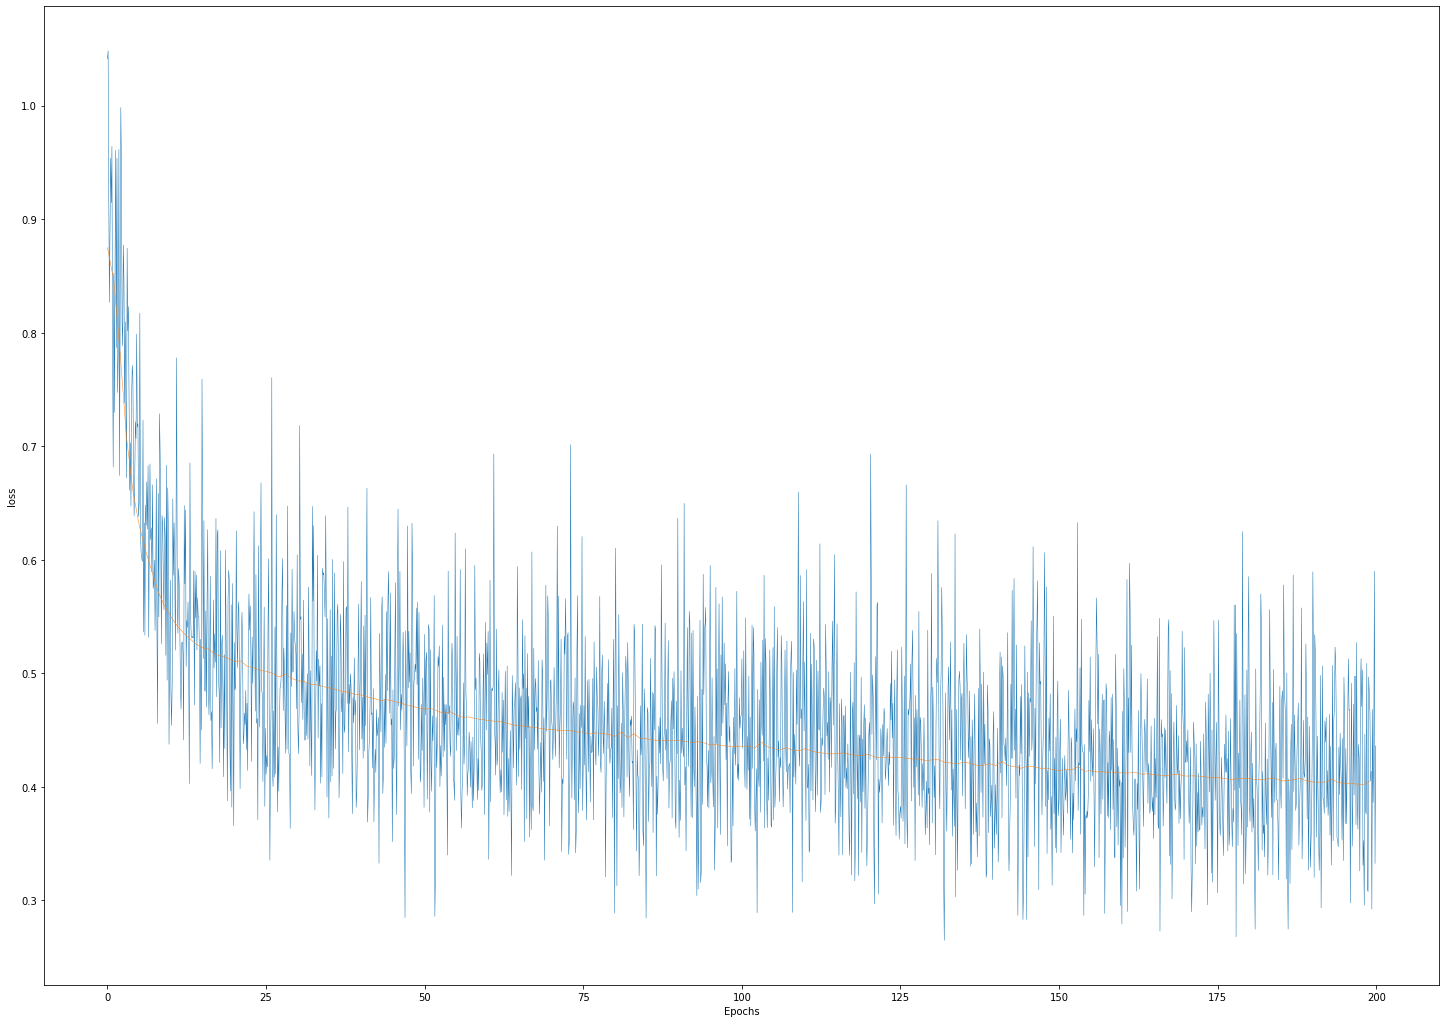

In [17]:
plot_loss(m3)

## Batch size 300 + learning rate 1e-4 + Sigmoid

In [18]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [19]:
model4 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.Sigmoid(), dropout=False)

In [20]:
m4 = Trainer(
        model=model4,
        optimizer=torch.optim.Adam(model4.parameters(), lr=1e-4),
        loss_function=nn.CrossEntropyLoss(),
        verbose=True
        )

cuda:0


In [21]:
lh = m4(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:1.0396, validation_loss:0.9221
Epoch [2/200], average_loss:0.9026, validation_loss:0.8847
Epoch [3/200], average_loss:0.8804, validation_loss:0.8686
Epoch [4/200], average_loss:0.8639, validation_loss:0.8500
Epoch [5/200], average_loss:0.8417, validation_loss:0.8252
Epoch [6/200], average_loss:0.8161, validation_loss:0.7964
Epoch [7/200], average_loss:0.7854, validation_loss:0.7654
Epoch [8/200], average_loss:0.7553, validation_loss:0.7349
Epoch [9/200], average_loss:0.7281, validation_loss:0.7098
Epoch [10/200], average_loss:0.7057, validation_loss:0.6885
Epoch [11/200], average_loss:0.6873, validation_loss:0.6704
Epoch [12/200], average_loss:0.6711, validation_loss:0.6550
Epoch [13/200], average_loss:0.6560, validation_loss:0.6402
Epoch [14/200], average_loss:0.6415, validation_loss:0.6268
Epoch [15/200], average_loss:0.6286, validation_loss:0.6137
Epoch [16/200], average_loss:0.6176, validation_loss:0.6016
Epoch [17/200], average_loss:0.6054, validation_l

Epoch [138/200], average_loss:0.4518, validation_loss:0.4460
Epoch [139/200], average_loss:0.4512, validation_loss:0.4448
Epoch [140/200], average_loss:0.4514, validation_loss:0.4451
Epoch [141/200], average_loss:0.4508, validation_loss:0.4445
Epoch [142/200], average_loss:0.4504, validation_loss:0.4442
Epoch [143/200], average_loss:0.4502, validation_loss:0.4442
Epoch [144/200], average_loss:0.4504, validation_loss:0.4438
Epoch [145/200], average_loss:0.4492, validation_loss:0.4431
Epoch [146/200], average_loss:0.4494, validation_loss:0.4427
Epoch [147/200], average_loss:0.4494, validation_loss:0.4423
Epoch [148/200], average_loss:0.4484, validation_loss:0.4426
Epoch [149/200], average_loss:0.4492, validation_loss:0.4421
Epoch [150/200], average_loss:0.4492, validation_loss:0.4417
Epoch [151/200], average_loss:0.4475, validation_loss:0.4414
Epoch [152/200], average_loss:0.4471, validation_loss:0.4415
Epoch [153/200], average_loss:0.4478, validation_loss:0.4407
Epoch [154/200], average

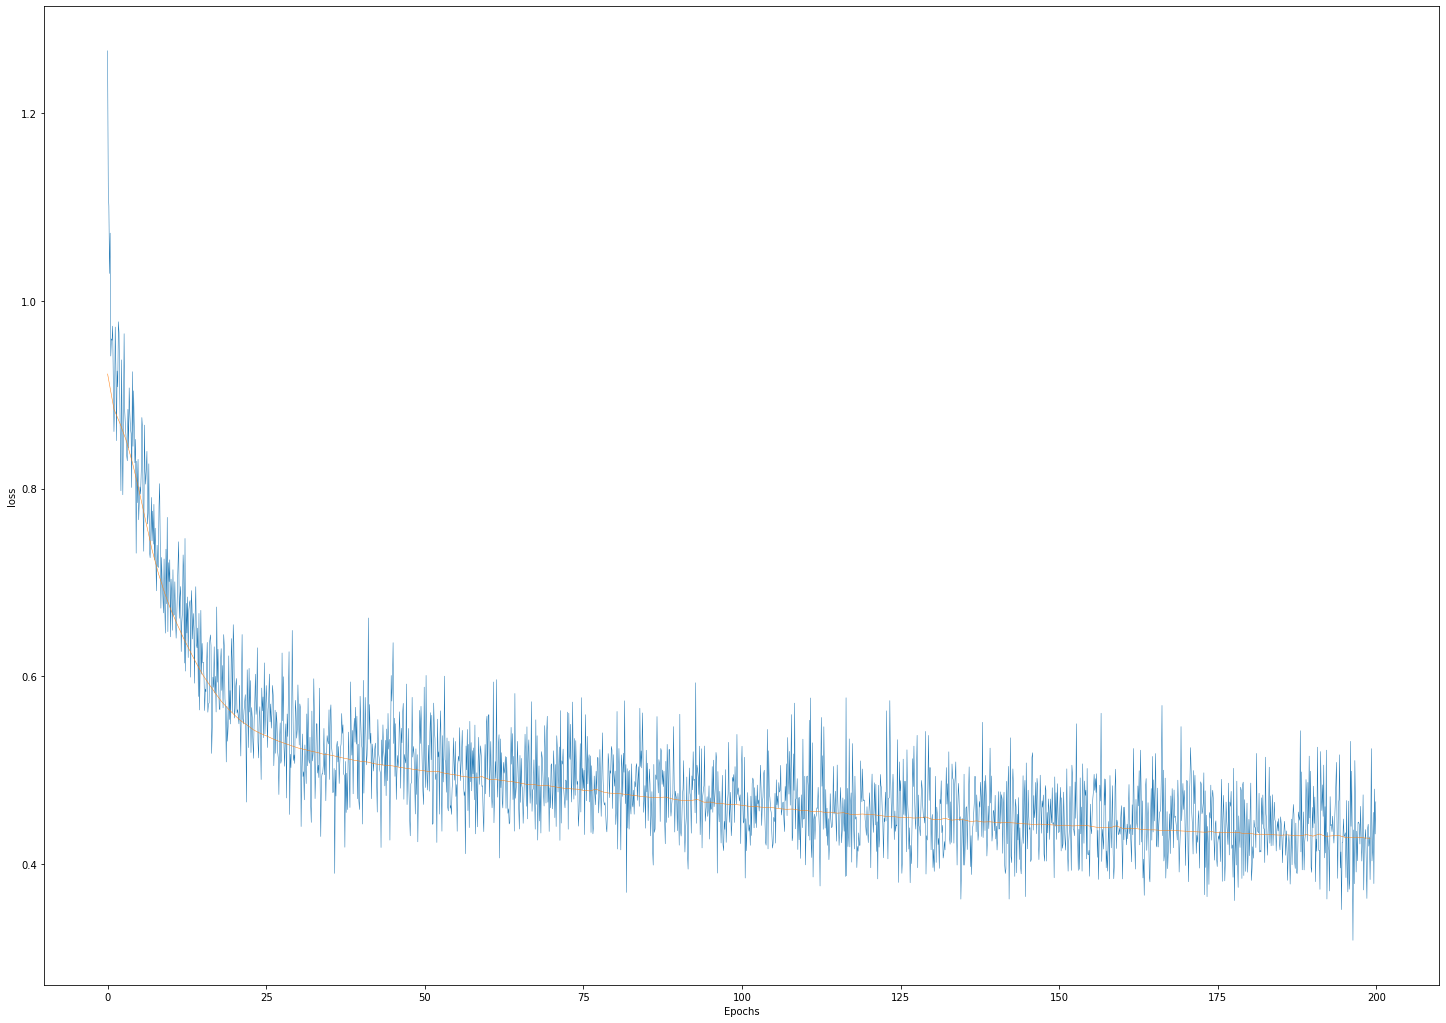

In [22]:
plot_loss(m4)

## Batch size 100 + learning rate 1e-3 and 1e-4 + Sigmoid

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

In [9]:
model5 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.Sigmoid(), dropout=False)

In [10]:
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-3)

In [11]:
m5 = Trainer(
    
        model=model5,
        optimizer=optimizer, # it is scheduler 
        loss_function=nn.CrossEntropyLoss(),
        scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50], gamma=0.1),
        verbose=True
        )

cuda:0


In [12]:
lh = m5(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.7231, validation_loss:0.5628
Epoch [2/200], average_loss:0.5470, validation_loss:0.5200
Epoch [3/200], average_loss:0.5190, validation_loss:0.5074
Epoch [4/200], average_loss:0.5018, validation_loss:0.4859
Epoch [5/200], average_loss:0.4892, validation_loss:0.4843
Epoch [6/200], average_loss:0.4773, validation_loss:0.4621
Epoch [7/200], average_loss:0.4693, validation_loss:0.4626
Epoch [8/200], average_loss:0.4630, validation_loss:0.4623
Epoch [9/200], average_loss:0.4575, validation_loss:0.4478
Epoch [10/200], average_loss:0.4535, validation_loss:0.4417
Epoch [11/200], average_loss:0.4507, validation_loss:0.4438
Epoch [12/200], average_loss:0.4474, validation_loss:0.4449
Epoch [13/200], average_loss:0.4427, validation_loss:0.4402
Epoch [14/200], average_loss:0.4416, validation_loss:0.4258
Epoch [15/200], average_loss:0.4388, validation_loss:0.4280
Epoch [16/200], average_loss:0.4337, validation_loss:0.4431
Epoch [17/200], average_loss:0.4318, validation_l

Epoch [138/200], average_loss:0.3581, validation_loss:0.3591
Epoch [139/200], average_loss:0.3581, validation_loss:0.3597
Epoch [140/200], average_loss:0.3578, validation_loss:0.3598
Epoch [141/200], average_loss:0.3578, validation_loss:0.3599
Epoch [142/200], average_loss:0.3579, validation_loss:0.3594
Epoch [143/200], average_loss:0.3575, validation_loss:0.3597
Epoch [144/200], average_loss:0.3576, validation_loss:0.3589
Epoch [145/200], average_loss:0.3576, validation_loss:0.3584
Epoch [146/200], average_loss:0.3575, validation_loss:0.3583
Epoch [147/200], average_loss:0.3573, validation_loss:0.3585
Epoch [148/200], average_loss:0.3572, validation_loss:0.3579
Epoch [149/200], average_loss:0.3570, validation_loss:0.3586
Epoch [150/200], average_loss:0.3570, validation_loss:0.3595
Epoch [151/200], average_loss:0.3569, validation_loss:0.3579
Epoch [152/200], average_loss:0.3565, validation_loss:0.3581
Epoch [153/200], average_loss:0.3566, validation_loss:0.3587
Epoch [154/200], average

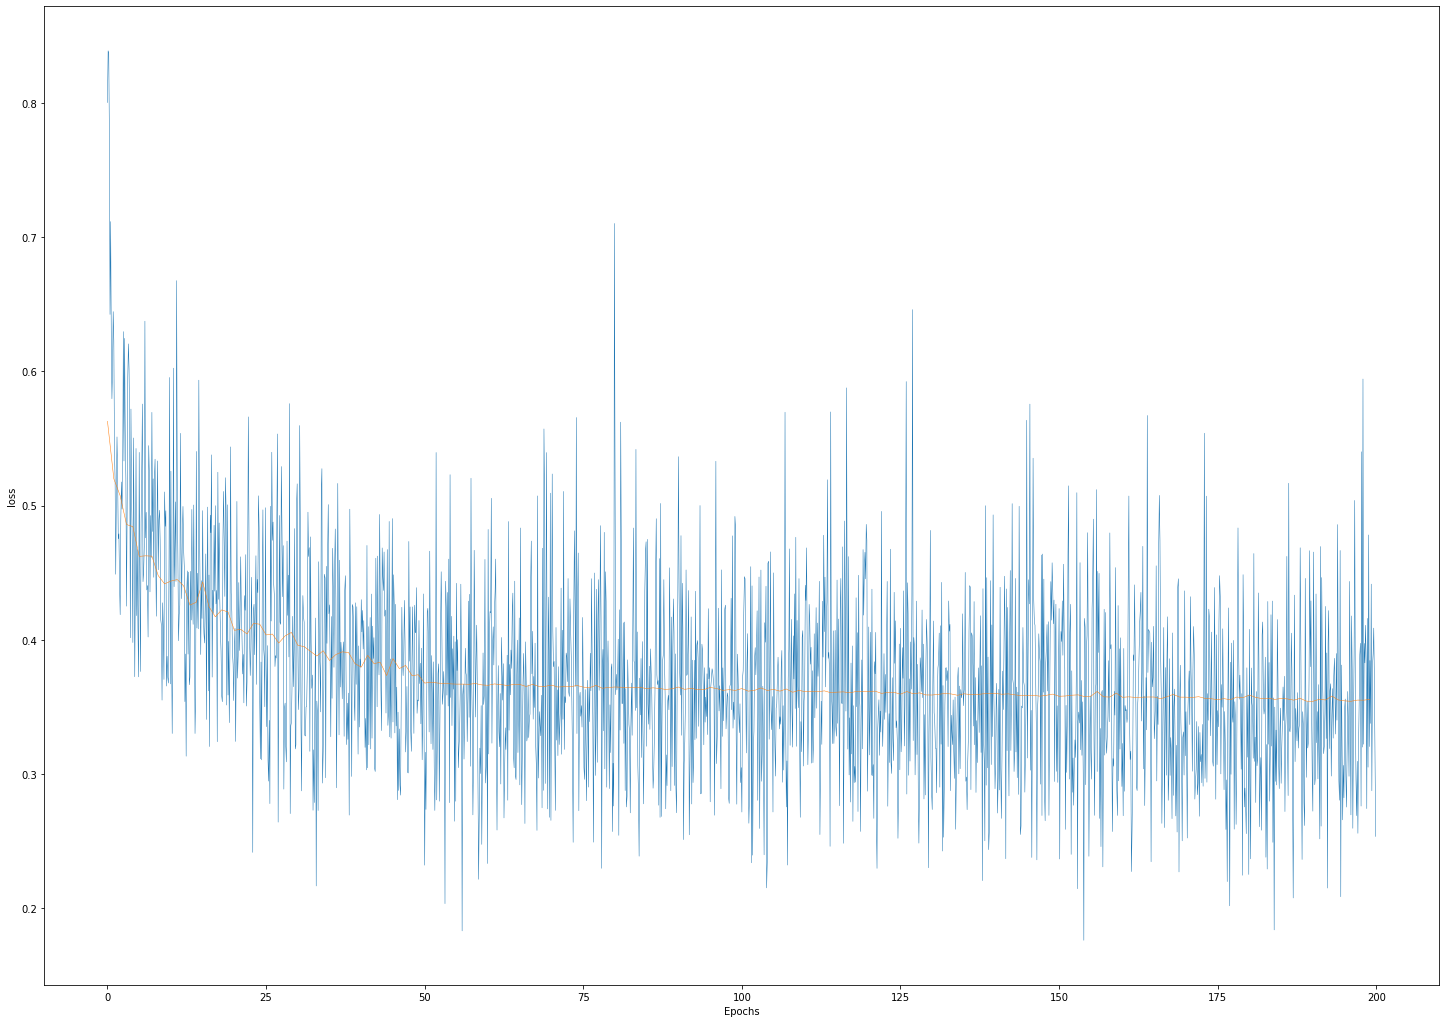

In [13]:
plot_loss(m5)

## Batch size 300 + learning rate 1e-3 and 1e-4 + Sigmoid

In [14]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [15]:
model6 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.Sigmoid(), dropout=False)

In [16]:
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-3)

In [18]:
m6 = Trainer(
        model=model6,
        optimizer=optimizer,
        loss_function=nn.CrossEntropyLoss(),
        scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50], gamma=0.1),
        verbose=True
        )

cuda:0


In [19]:
lh = m6(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.8722, validation_loss:0.7447
Epoch [2/200], average_loss:0.6574, validation_loss:0.5895
Epoch [3/200], average_loss:0.5689, validation_loss:0.5415
Epoch [4/200], average_loss:0.5404, validation_loss:0.5261
Epoch [5/200], average_loss:0.5237, validation_loss:0.5093
Epoch [6/200], average_loss:0.5118, validation_loss:0.5016
Epoch [7/200], average_loss:0.5030, validation_loss:0.4913
Epoch [8/200], average_loss:0.4957, validation_loss:0.4872
Epoch [9/200], average_loss:0.4893, validation_loss:0.4814
Epoch [10/200], average_loss:0.4831, validation_loss:0.4727
Epoch [11/200], average_loss:0.4760, validation_loss:0.4746
Epoch [12/200], average_loss:0.4716, validation_loss:0.4674
Epoch [13/200], average_loss:0.4676, validation_loss:0.4613
Epoch [14/200], average_loss:0.4646, validation_loss:0.4589
Epoch [15/200], average_loss:0.4623, validation_loss:0.4563
Epoch [16/200], average_loss:0.4583, validation_loss:0.4492
Epoch [17/200], average_loss:0.4553, validation_l

Epoch [138/200], average_loss:0.3896, validation_loss:0.3842
Epoch [139/200], average_loss:0.3892, validation_loss:0.3852
Epoch [140/200], average_loss:0.3889, validation_loss:0.3847
Epoch [141/200], average_loss:0.3894, validation_loss:0.3852
Epoch [142/200], average_loss:0.3888, validation_loss:0.3845
Epoch [143/200], average_loss:0.3884, validation_loss:0.3842
Epoch [144/200], average_loss:0.3890, validation_loss:0.3844
Epoch [145/200], average_loss:0.3892, validation_loss:0.3858
Epoch [146/200], average_loss:0.3886, validation_loss:0.3850
Epoch [147/200], average_loss:0.3886, validation_loss:0.3845
Epoch [148/200], average_loss:0.3883, validation_loss:0.3846
Epoch [149/200], average_loss:0.3879, validation_loss:0.3855
Epoch [150/200], average_loss:0.3883, validation_loss:0.3844
Epoch [151/200], average_loss:0.3882, validation_loss:0.3833
Epoch [152/200], average_loss:0.3878, validation_loss:0.3836
Epoch [153/200], average_loss:0.3881, validation_loss:0.3835
Epoch [154/200], average

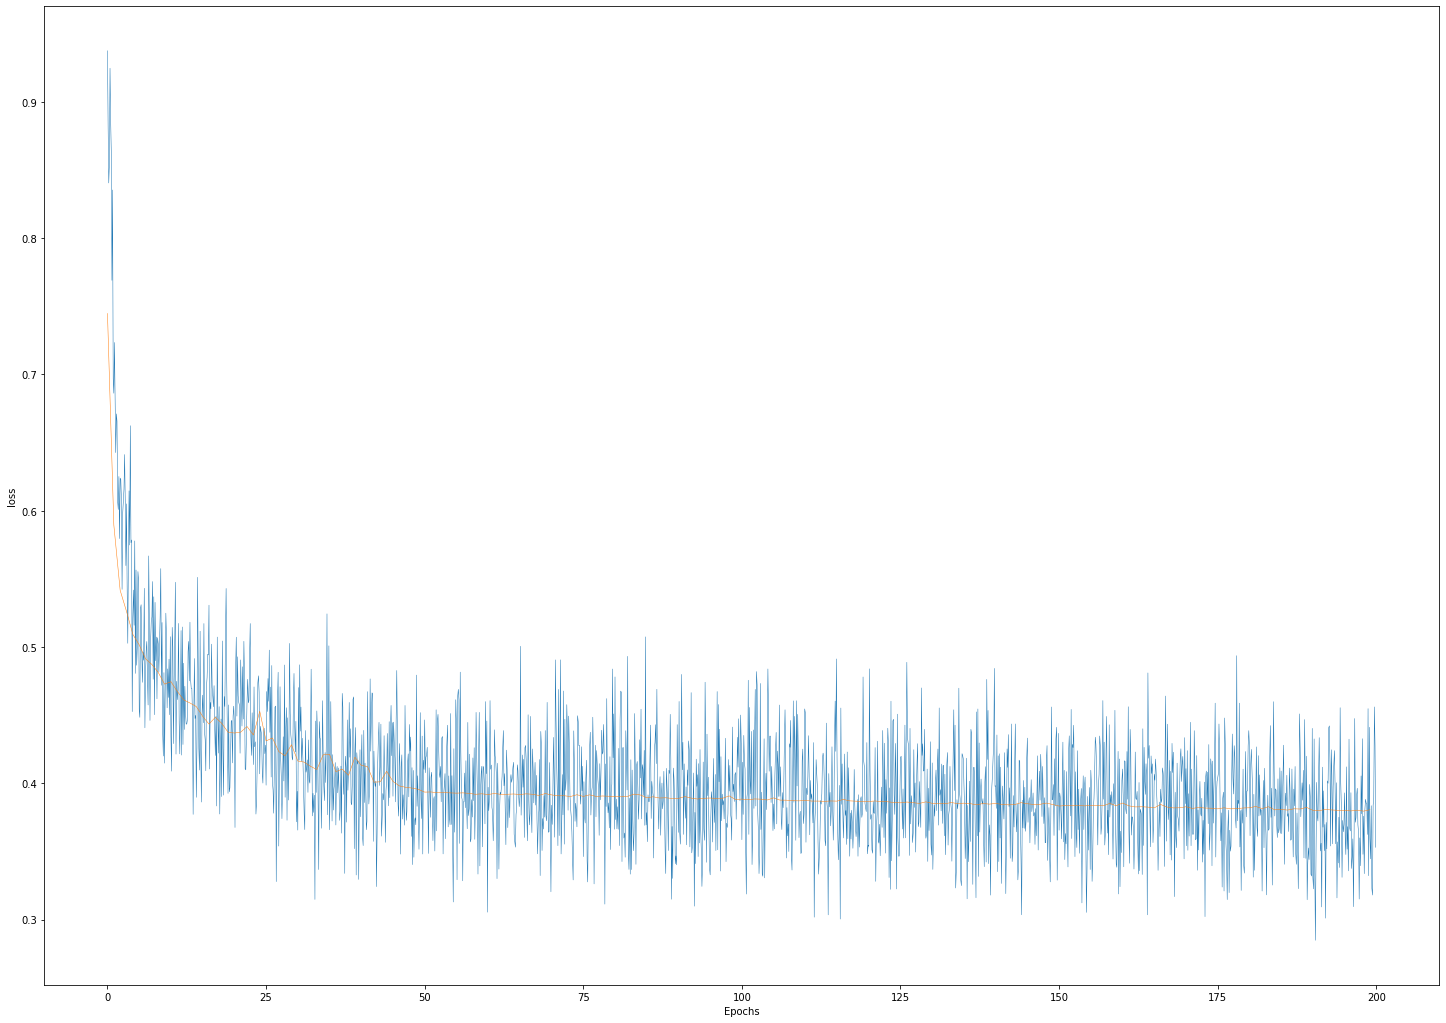

In [20]:
plot_loss(m6)

## Batch size 300 + learning rate 1e-2, 1e-3 and 1e-4 + Sigmoid

In [21]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [22]:
model7 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.Sigmoid(), dropout=False)

In [23]:
optimizer = torch.optim.Adam(model7.parameters(), lr=1e-2)

In [24]:
m7 = Trainer(
        model=model7,
        optimizer=optimizer,
        loss_function=nn.CrossEntropyLoss(),
        scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50,100], gamma=0.1),
        verbose=True
        )

cuda:0


In [25]:
lh = m7(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.6857, validation_loss:0.5337
Epoch [2/200], average_loss:0.5087, validation_loss:0.4778
Epoch [3/200], average_loss:0.4761, validation_loss:0.4770
Epoch [4/200], average_loss:0.4562, validation_loss:0.4547
Epoch [5/200], average_loss:0.4436, validation_loss:0.4402
Epoch [6/200], average_loss:0.4373, validation_loss:0.4324
Epoch [7/200], average_loss:0.4246, validation_loss:0.4390
Epoch [8/200], average_loss:0.4236, validation_loss:0.4240
Epoch [9/200], average_loss:0.4132, validation_loss:0.4261
Epoch [10/200], average_loss:0.4075, validation_loss:0.4004
Epoch [11/200], average_loss:0.4019, validation_loss:0.3889
Epoch [12/200], average_loss:0.4009, validation_loss:0.4048
Epoch [13/200], average_loss:0.3943, validation_loss:0.4048
Epoch [14/200], average_loss:0.3967, validation_loss:0.3933
Epoch [15/200], average_loss:0.3884, validation_loss:0.3746
Epoch [16/200], average_loss:0.3850, validation_loss:0.3831
Epoch [17/200], average_loss:0.3886, validation_l

Epoch [138/200], average_loss:0.2365, validation_loss:0.2934
Epoch [139/200], average_loss:0.2365, validation_loss:0.2925
Epoch [140/200], average_loss:0.2368, validation_loss:0.2933
Epoch [141/200], average_loss:0.2362, validation_loss:0.2931
Epoch [142/200], average_loss:0.2363, validation_loss:0.2921
Epoch [143/200], average_loss:0.2362, validation_loss:0.2923
Epoch [144/200], average_loss:0.2359, validation_loss:0.2922
Epoch [145/200], average_loss:0.2360, validation_loss:0.2926
Epoch [146/200], average_loss:0.2361, validation_loss:0.2926
Epoch [147/200], average_loss:0.2358, validation_loss:0.2927
Epoch [148/200], average_loss:0.2360, validation_loss:0.2933
Epoch [149/200], average_loss:0.2357, validation_loss:0.2924
Epoch [150/200], average_loss:0.2355, validation_loss:0.2920
Epoch [151/200], average_loss:0.2351, validation_loss:0.2919
Epoch [152/200], average_loss:0.2355, validation_loss:0.2916
Epoch [153/200], average_loss:0.2356, validation_loss:0.2919
Epoch [154/200], average

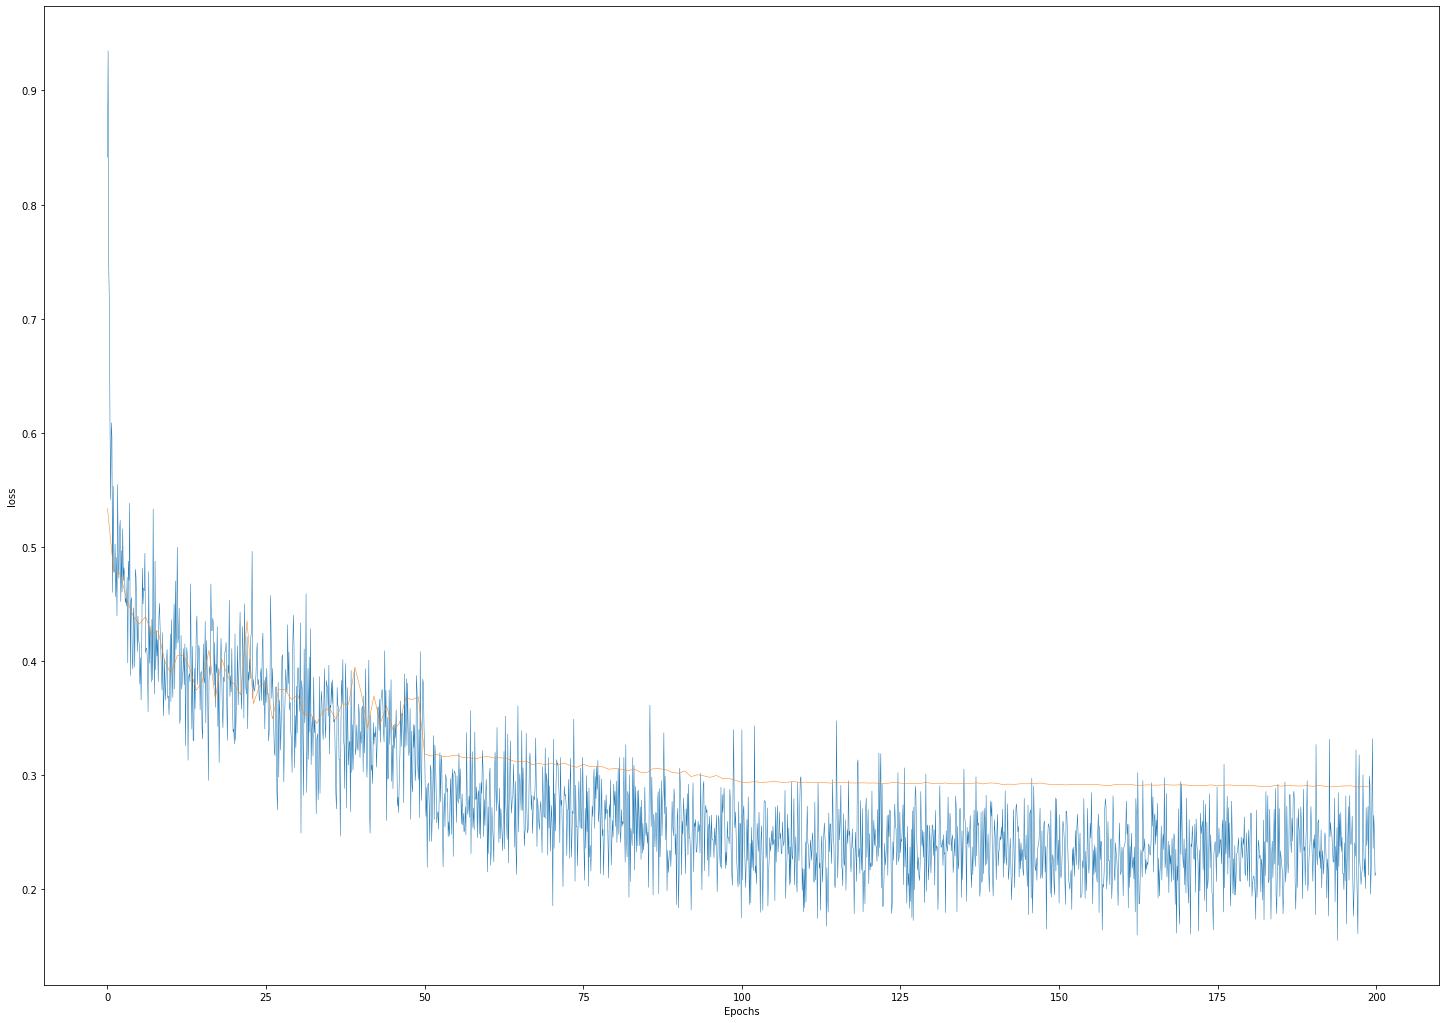

In [26]:
plot_loss(m7)

## Batch size 100 + learning rate 1e-2 + ReLU

In [27]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

In [28]:
model11 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ReLU(), dropout=False)

In [29]:
m11 = Trainer(
        model=model11,
        optimizer=torch.optim.Adam(model11.parameters(), lr=1e-2),
        loss_function=nn.CrossEntropyLoss(),
        verbose=True
        )

cuda:0


In [30]:
lh = m11(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.5713, validation_loss:0.5202
Epoch [2/200], average_loss:0.4995, validation_loss:0.5225
Epoch [3/200], average_loss:0.4794, validation_loss:0.4479
Epoch [4/200], average_loss:0.4675, validation_loss:0.4384
Epoch [5/200], average_loss:0.4628, validation_loss:0.5083
Epoch [6/200], average_loss:0.4708, validation_loss:0.4455
Epoch [7/200], average_loss:0.4559, validation_loss:0.5001
Epoch [8/200], average_loss:0.4418, validation_loss:0.4287
Epoch [9/200], average_loss:0.4223, validation_loss:0.4213
Epoch [10/200], average_loss:0.4093, validation_loss:0.3906
Epoch [11/200], average_loss:0.4085, validation_loss:0.3856
Epoch [12/200], average_loss:0.3870, validation_loss:0.3785
Epoch [13/200], average_loss:0.3832, validation_loss:0.3942
Epoch [14/200], average_loss:0.3699, validation_loss:0.3791
Epoch [15/200], average_loss:0.3726, validation_loss:0.3691
Epoch [16/200], average_loss:0.3688, validation_loss:0.3590
Epoch [17/200], average_loss:0.3642, validation_l

Epoch [138/200], average_loss:0.2980, validation_loss:0.3148
Epoch [139/200], average_loss:0.2944, validation_loss:0.3148
Epoch [140/200], average_loss:0.3032, validation_loss:0.3119
Epoch [141/200], average_loss:0.2912, validation_loss:0.3144
Epoch [142/200], average_loss:0.2946, validation_loss:0.3347
Epoch [143/200], average_loss:0.3074, validation_loss:0.2968
Epoch [144/200], average_loss:0.2933, validation_loss:0.3095
Epoch [145/200], average_loss:0.2921, validation_loss:0.3475
Epoch [146/200], average_loss:0.3020, validation_loss:0.3066
Epoch [147/200], average_loss:0.3039, validation_loss:0.3034
Epoch [148/200], average_loss:0.2928, validation_loss:0.3029
Epoch [149/200], average_loss:0.2955, validation_loss:0.3088
Epoch [150/200], average_loss:0.2920, validation_loss:0.3112
Epoch [151/200], average_loss:0.3110, validation_loss:0.3138
Epoch [152/200], average_loss:0.3062, validation_loss:0.3386
Epoch [153/200], average_loss:0.2969, validation_loss:0.3245
Epoch [154/200], average

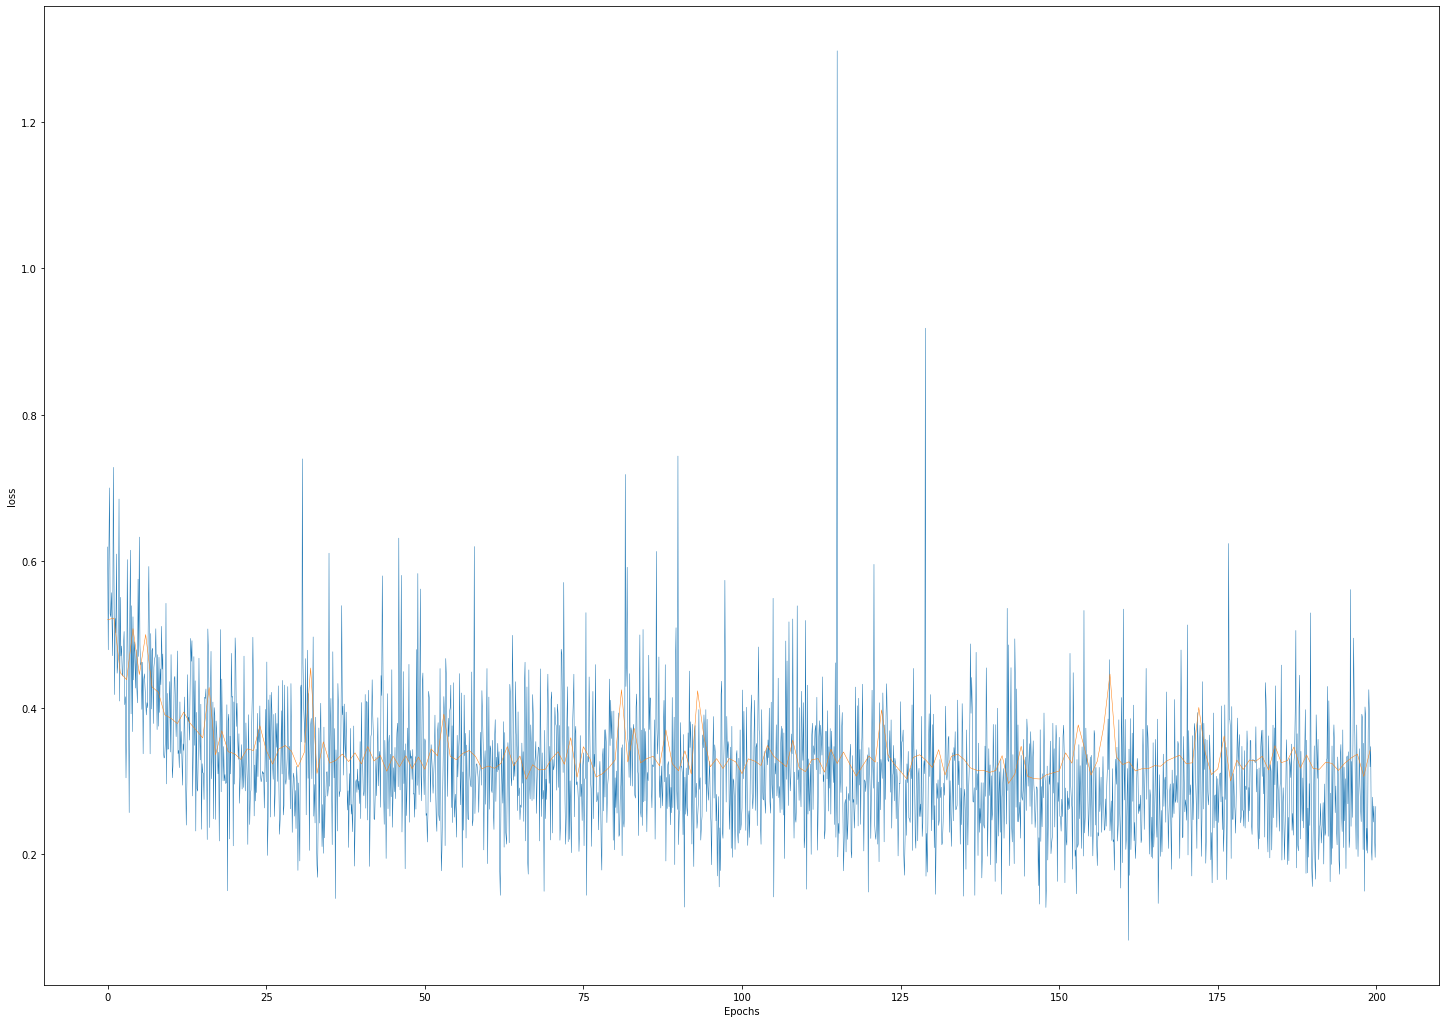

In [31]:
plot_loss(m11)

## Batch size 100 + learning rate 1e-3 + ReLU

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

In [33]:
model12 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ReLU(), dropout=False)

In [34]:
m12 = Trainer(
        model=model12,
        optimizer=torch.optim.Adam(model12.parameters(), lr=1e-3),
        loss_function=nn.CrossEntropyLoss(),
        verbose=True
        )

cuda:0


In [35]:
lh = m12(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.5956, validation_loss:0.4882
Epoch [2/200], average_loss:0.4761, validation_loss:0.4469
Epoch [3/200], average_loss:0.4540, validation_loss:0.4425
Epoch [4/200], average_loss:0.4398, validation_loss:0.4262
Epoch [5/200], average_loss:0.4309, validation_loss:0.4063
Epoch [6/200], average_loss:0.4188, validation_loss:0.3923
Epoch [7/200], average_loss:0.4021, validation_loss:0.3852
Epoch [8/200], average_loss:0.3898, validation_loss:0.3734
Epoch [9/200], average_loss:0.3740, validation_loss:0.3544
Epoch [10/200], average_loss:0.3603, validation_loss:0.3506
Epoch [11/200], average_loss:0.3482, validation_loss:0.3294
Epoch [12/200], average_loss:0.3425, validation_loss:0.3258
Epoch [13/200], average_loss:0.3334, validation_loss:0.3284
Epoch [14/200], average_loss:0.3279, validation_loss:0.3108
Epoch [15/200], average_loss:0.3241, validation_loss:0.3146
Epoch [16/200], average_loss:0.3190, validation_loss:0.3073
Epoch [17/200], average_loss:0.3161, validation_l

Epoch [138/200], average_loss:0.1817, validation_loss:0.2593
Epoch [139/200], average_loss:0.1841, validation_loss:0.2380
Epoch [140/200], average_loss:0.1812, validation_loss:0.2539
Epoch [141/200], average_loss:0.1798, validation_loss:0.2600
Epoch [142/200], average_loss:0.1827, validation_loss:0.2469
Epoch [143/200], average_loss:0.1836, validation_loss:0.2789
Epoch [144/200], average_loss:0.1779, validation_loss:0.2469
Epoch [145/200], average_loss:0.1783, validation_loss:0.2396
Epoch [146/200], average_loss:0.1792, validation_loss:0.2482
Epoch [147/200], average_loss:0.1792, validation_loss:0.2449
Epoch [148/200], average_loss:0.1754, validation_loss:0.2397
Epoch [149/200], average_loss:0.1777, validation_loss:0.2472
Epoch [150/200], average_loss:0.1770, validation_loss:0.2516
Epoch [151/200], average_loss:0.1777, validation_loss:0.2573
Epoch [152/200], average_loss:0.1804, validation_loss:0.2429
Epoch [153/200], average_loss:0.1752, validation_loss:0.2481
Epoch [154/200], average

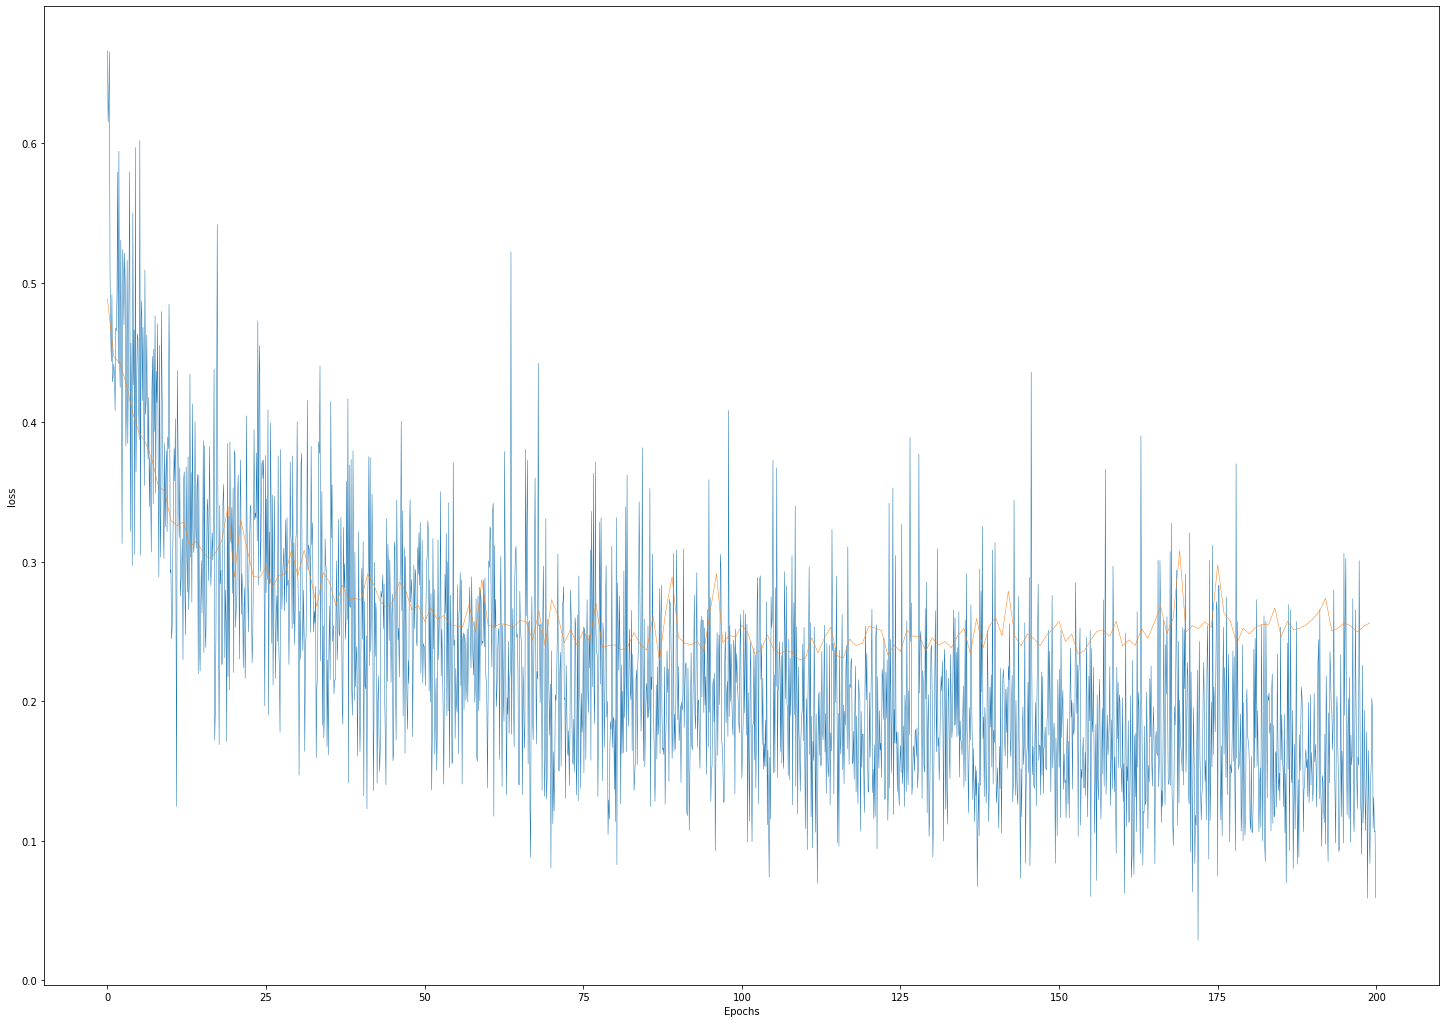

In [36]:
plot_loss(m12)

## Batch size 100 + learning rate 1e-4 + ReLU

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

In [9]:
model13 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ReLU(), dropout=False)

In [10]:
m13 = Trainer(
        model=model13,
        optimizer=torch.optim.Adam(model13.parameters(), lr=1e-4),
        loss_function=nn.CrossEntropyLoss(),
        tensorboard=True,
        verbose=True
        )

cuda:0


In [11]:
lh = m13(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.8928, validation_loss:0.7056, val_accuracy:0.8056
Epoch [2/200], average_loss:0.6458, validation_loss:0.5854, val_accuracy:0.7500
Epoch [3/200], average_loss:0.5672, validation_loss:0.5363, val_accuracy:0.8611
Epoch [4/200], average_loss:0.5331, validation_loss:0.5200, val_accuracy:0.8889
Epoch [5/200], average_loss:0.5137, validation_loss:0.4977, val_accuracy:0.6944
Epoch [6/200], average_loss:0.4998, validation_loss:0.4882, val_accuracy:0.8333
Epoch [7/200], average_loss:0.4888, validation_loss:0.4779, val_accuracy:0.7500
Epoch [8/200], average_loss:0.4801, validation_loss:0.4712, val_accuracy:0.8333
Epoch [9/200], average_loss:0.4744, validation_loss:0.4613, val_accuracy:0.8889
Epoch [10/200], average_loss:0.4687, validation_loss:0.4609, val_accuracy:0.8333
Epoch [11/200], average_loss:0.4639, validation_loss:0.4566, val_accuracy:0.8056
Epoch [12/200], average_loss:0.4598, validation_loss:0.4483, val_accuracy:0.7778
Epoch [13/200], average_loss:0.4563, 

Epoch [103/200], average_loss:0.3568, validation_loss:0.3563, val_accuracy:0.8889
Epoch [104/200], average_loss:0.3560, validation_loss:0.3571, val_accuracy:0.8611
Epoch [105/200], average_loss:0.3548, validation_loss:0.3551, val_accuracy:0.9444
Epoch [106/200], average_loss:0.3541, validation_loss:0.3526, val_accuracy:0.8889
Epoch [107/200], average_loss:0.3523, validation_loss:0.3594, val_accuracy:0.8611
Epoch [108/200], average_loss:0.3521, validation_loss:0.3498, val_accuracy:0.8611
Epoch [109/200], average_loss:0.3510, validation_loss:0.3492, val_accuracy:0.8889
Epoch [110/200], average_loss:0.3491, validation_loss:0.3474, val_accuracy:0.8611
Epoch [111/200], average_loss:0.3484, validation_loss:0.3505, val_accuracy:0.8889
Epoch [112/200], average_loss:0.3476, validation_loss:0.3430, val_accuracy:0.8889
Epoch [113/200], average_loss:0.3461, validation_loss:0.3421, val_accuracy:0.8611
Epoch [114/200], average_loss:0.3446, validation_loss:0.3479, val_accuracy:0.8889
Epoch [115/200],

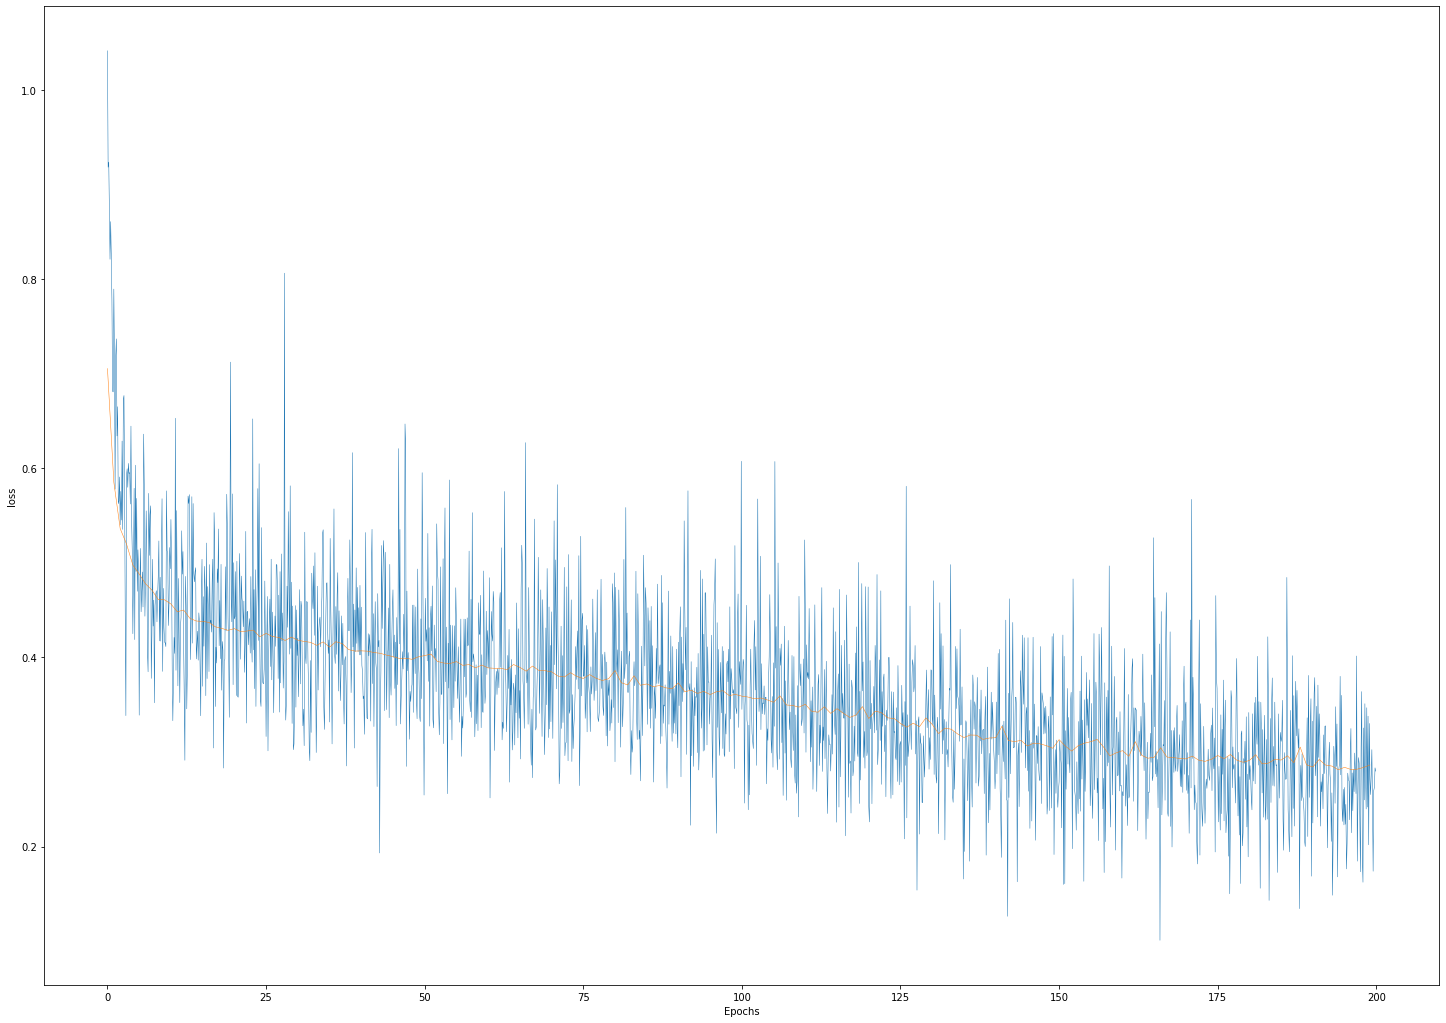

In [12]:
plot_loss(m13)

In [13]:
#m13.tb.close()

## Batch size 300 + learning rate 1e-2 + ReLU

In [13]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [14]:
model14 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ReLU(), dropout=False)

In [15]:
m14 = Trainer(
        model=model14,
        optimizer=torch.optim.Adam(model14.parameters(), lr=1e-2),
        loss_function=nn.CrossEntropyLoss(),
        tensorboard=True,
        model_name=None,
        verbose=True
        )

cuda:0


In [16]:
lh = m14(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.6076, validation_loss:0.5078, val_accuracy:0.8051
Epoch [2/200], average_loss:0.4817, validation_loss:0.4726, val_accuracy:0.7458
Epoch [3/200], average_loss:0.4610, validation_loss:0.4509, val_accuracy:0.8220
Epoch [4/200], average_loss:0.4508, validation_loss:0.4507, val_accuracy:0.8178
Epoch [5/200], average_loss:0.4373, validation_loss:0.4161, val_accuracy:0.8136
Epoch [6/200], average_loss:0.4301, validation_loss:0.4960, val_accuracy:0.7373
Epoch [7/200], average_loss:0.4252, validation_loss:0.4168, val_accuracy:0.7881
Epoch [8/200], average_loss:0.4181, validation_loss:0.4223, val_accuracy:0.8051
Epoch [9/200], average_loss:0.4011, validation_loss:0.4034, val_accuracy:0.8305
Epoch [10/200], average_loss:0.3874, validation_loss:0.3742, val_accuracy:0.8390
Epoch [11/200], average_loss:0.3725, validation_loss:0.4212, val_accuracy:0.8220
Epoch [12/200], average_loss:0.3588, validation_loss:0.3621, val_accuracy:0.8686
Epoch [13/200], average_loss:0.3521, 

Epoch [103/200], average_loss:0.2507, validation_loss:0.2714, val_accuracy:0.8771
Epoch [104/200], average_loss:0.2548, validation_loss:0.2805, val_accuracy:0.8898
Epoch [105/200], average_loss:0.2551, validation_loss:0.2815, val_accuracy:0.9068
Epoch [106/200], average_loss:0.2505, validation_loss:0.2899, val_accuracy:0.8686
Epoch [107/200], average_loss:0.2569, validation_loss:0.2681, val_accuracy:0.8941
Epoch [108/200], average_loss:0.2489, validation_loss:0.3298, val_accuracy:0.8686
Epoch [109/200], average_loss:0.2515, validation_loss:0.2890, val_accuracy:0.9110
Epoch [110/200], average_loss:0.2582, validation_loss:0.2683, val_accuracy:0.8941
Epoch [111/200], average_loss:0.2483, validation_loss:0.2800, val_accuracy:0.9068
Epoch [112/200], average_loss:0.2536, validation_loss:0.2789, val_accuracy:0.8390
Epoch [113/200], average_loss:0.2478, validation_loss:0.2618, val_accuracy:0.9110
Epoch [114/200], average_loss:0.2480, validation_loss:0.2572, val_accuracy:0.9068
Epoch [115/200],

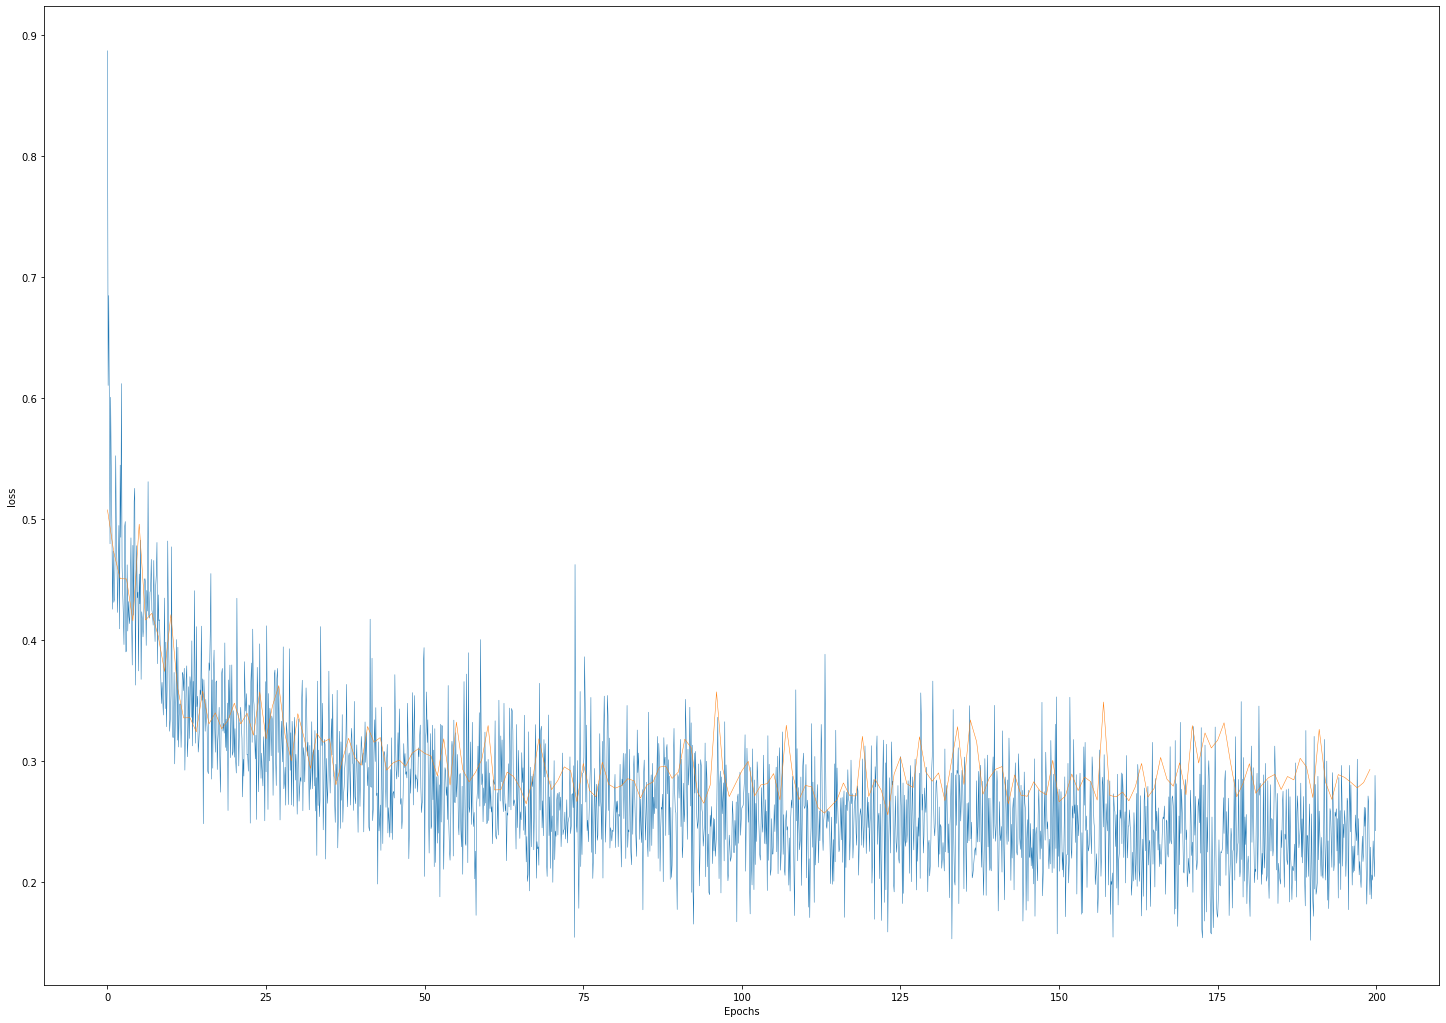

In [17]:
plot_loss(m14)

## Batch size 300 + learning rate 1e-3 + ReLU

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [9]:
model15 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ReLU(), dropout=False)

In [10]:
m15 = Trainer(
        model=model15,
        optimizer=torch.optim.Adam(model15.parameters(), lr=1e-3),
        loss_function=nn.CrossEntropyLoss(),
        tensorboard=True,
        model_name=None,#"DNN_128-64_bs-300_lr-0.001_ReLU",
        verbose=True
        )

cuda:0


In [11]:
lh = m15(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.6873, validation_loss:0.5295, val_accuracy:0.7669
Epoch [2/200], average_loss:0.5126, validation_loss:0.4909, val_accuracy:0.7881
Epoch [3/200], average_loss:0.4793, validation_loss:0.4571, val_accuracy:0.7924
Epoch [4/200], average_loss:0.4602, validation_loss:0.4525, val_accuracy:0.7966
Epoch [5/200], average_loss:0.4491, validation_loss:0.4420, val_accuracy:0.8220
Epoch [6/200], average_loss:0.4388, validation_loss:0.4315, val_accuracy:0.8051
Epoch [7/200], average_loss:0.4360, validation_loss:0.4348, val_accuracy:0.8051
Epoch [8/200], average_loss:0.4286, validation_loss:0.4146, val_accuracy:0.7797
Epoch [9/200], average_loss:0.4206, validation_loss:0.4129, val_accuracy:0.7881
Epoch [10/200], average_loss:0.4170, validation_loss:0.4180, val_accuracy:0.8390
Epoch [11/200], average_loss:0.4110, validation_loss:0.4007, val_accuracy:0.7712
Epoch [12/200], average_loss:0.4101, validation_loss:0.4359, val_accuracy:0.7754
Epoch [13/200], average_loss:0.4022, 

Epoch [103/200], average_loss:0.2244, validation_loss:0.2443, val_accuracy:0.9153
Epoch [104/200], average_loss:0.2263, validation_loss:0.2845, val_accuracy:0.9110
Epoch [105/200], average_loss:0.2286, validation_loss:0.2515, val_accuracy:0.9237
Epoch [106/200], average_loss:0.2233, validation_loss:0.2531, val_accuracy:0.8856
Epoch [107/200], average_loss:0.2248, validation_loss:0.2526, val_accuracy:0.8771
Epoch [108/200], average_loss:0.2236, validation_loss:0.2468, val_accuracy:0.9195
Epoch [109/200], average_loss:0.2243, validation_loss:0.2464, val_accuracy:0.9025
Epoch [110/200], average_loss:0.2205, validation_loss:0.2763, val_accuracy:0.9025
Epoch [111/200], average_loss:0.2230, validation_loss:0.2435, val_accuracy:0.9195
Epoch [112/200], average_loss:0.2220, validation_loss:0.2560, val_accuracy:0.8898
Epoch [113/200], average_loss:0.2212, validation_loss:0.2565, val_accuracy:0.8941
Epoch [114/200], average_loss:0.2182, validation_loss:0.2432, val_accuracy:0.9364
Epoch [115/200],

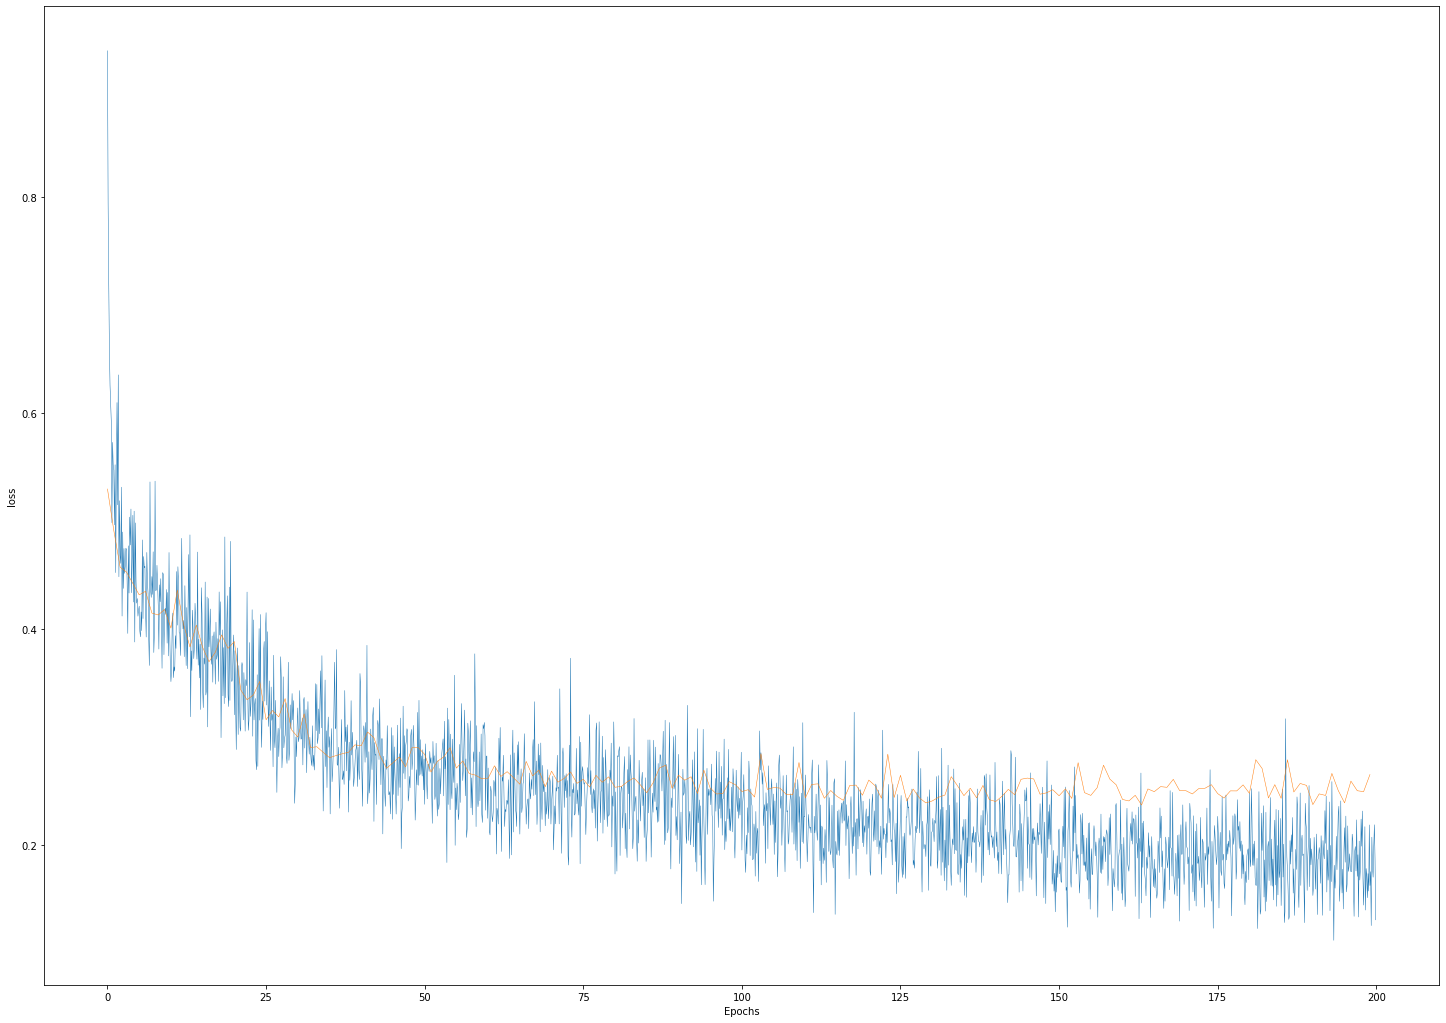

In [12]:
plot_loss(m15)

In [14]:
m15.tb.close()

In [15]:
#torch.save(m15.model.model, "models_and_losses/DNN_128-64_bs-300_lr-0.001_ReLU.pt")

C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LinearBlock. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upo

## Batch size 300 + learning rate 1e-4 + ReLU

In [16]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [17]:
model16 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ReLU(), dropout=False)

In [18]:
m16 = Trainer(
        model=model16,
        optimizer=torch.optim.Adam(model16.parameters(), lr=1e-4),
        loss_function=nn.CrossEntropyLoss(),
        tensorboard=True,
        model_name="DNN_128-64_bs-300_lr-0.0001_ReLU",
        verbose=True
        )

cuda:0


In [19]:
lh = m16(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:1.0359, validation_loss:0.8828, val_accuracy:0.6356
Epoch [2/200], average_loss:0.8012, validation_loss:0.7350, val_accuracy:0.7712
Epoch [3/200], average_loss:0.7050, validation_loss:0.6685, val_accuracy:0.7966
Epoch [4/200], average_loss:0.6466, validation_loss:0.6116, val_accuracy:0.7966
Epoch [5/200], average_loss:0.5955, validation_loss:0.5694, val_accuracy:0.7924
Epoch [6/200], average_loss:0.5605, validation_loss:0.5418, val_accuracy:0.8051
Epoch [7/200], average_loss:0.5386, validation_loss:0.5230, val_accuracy:0.7839
Epoch [8/200], average_loss:0.5245, validation_loss:0.5125, val_accuracy:0.7076
Epoch [9/200], average_loss:0.5137, validation_loss:0.5029, val_accuracy:0.7458
Epoch [10/200], average_loss:0.5037, validation_loss:0.4928, val_accuracy:0.7881
Epoch [11/200], average_loss:0.4957, validation_loss:0.4865, val_accuracy:0.8305
Epoch [12/200], average_loss:0.4897, validation_loss:0.4788, val_accuracy:0.7712
Epoch [13/200], average_loss:0.4840, 

Epoch [103/200], average_loss:0.3828, validation_loss:0.3795, val_accuracy:0.8771
Epoch [104/200], average_loss:0.3831, validation_loss:0.3772, val_accuracy:0.8263
Epoch [105/200], average_loss:0.3822, validation_loss:0.3802, val_accuracy:0.8347
Epoch [106/200], average_loss:0.3814, validation_loss:0.3782, val_accuracy:0.8771
Epoch [107/200], average_loss:0.3806, validation_loss:0.3753, val_accuracy:0.8432
Epoch [108/200], average_loss:0.3808, validation_loss:0.3778, val_accuracy:0.8475
Epoch [109/200], average_loss:0.3798, validation_loss:0.3749, val_accuracy:0.8898
Epoch [110/200], average_loss:0.3787, validation_loss:0.3736, val_accuracy:0.8517
Epoch [111/200], average_loss:0.3785, validation_loss:0.3762, val_accuracy:0.8263
Epoch [112/200], average_loss:0.3773, validation_loss:0.3796, val_accuracy:0.8517
Epoch [113/200], average_loss:0.3775, validation_loss:0.3724, val_accuracy:0.8178
Epoch [114/200], average_loss:0.3773, validation_loss:0.3746, val_accuracy:0.8517
Epoch [115/200],

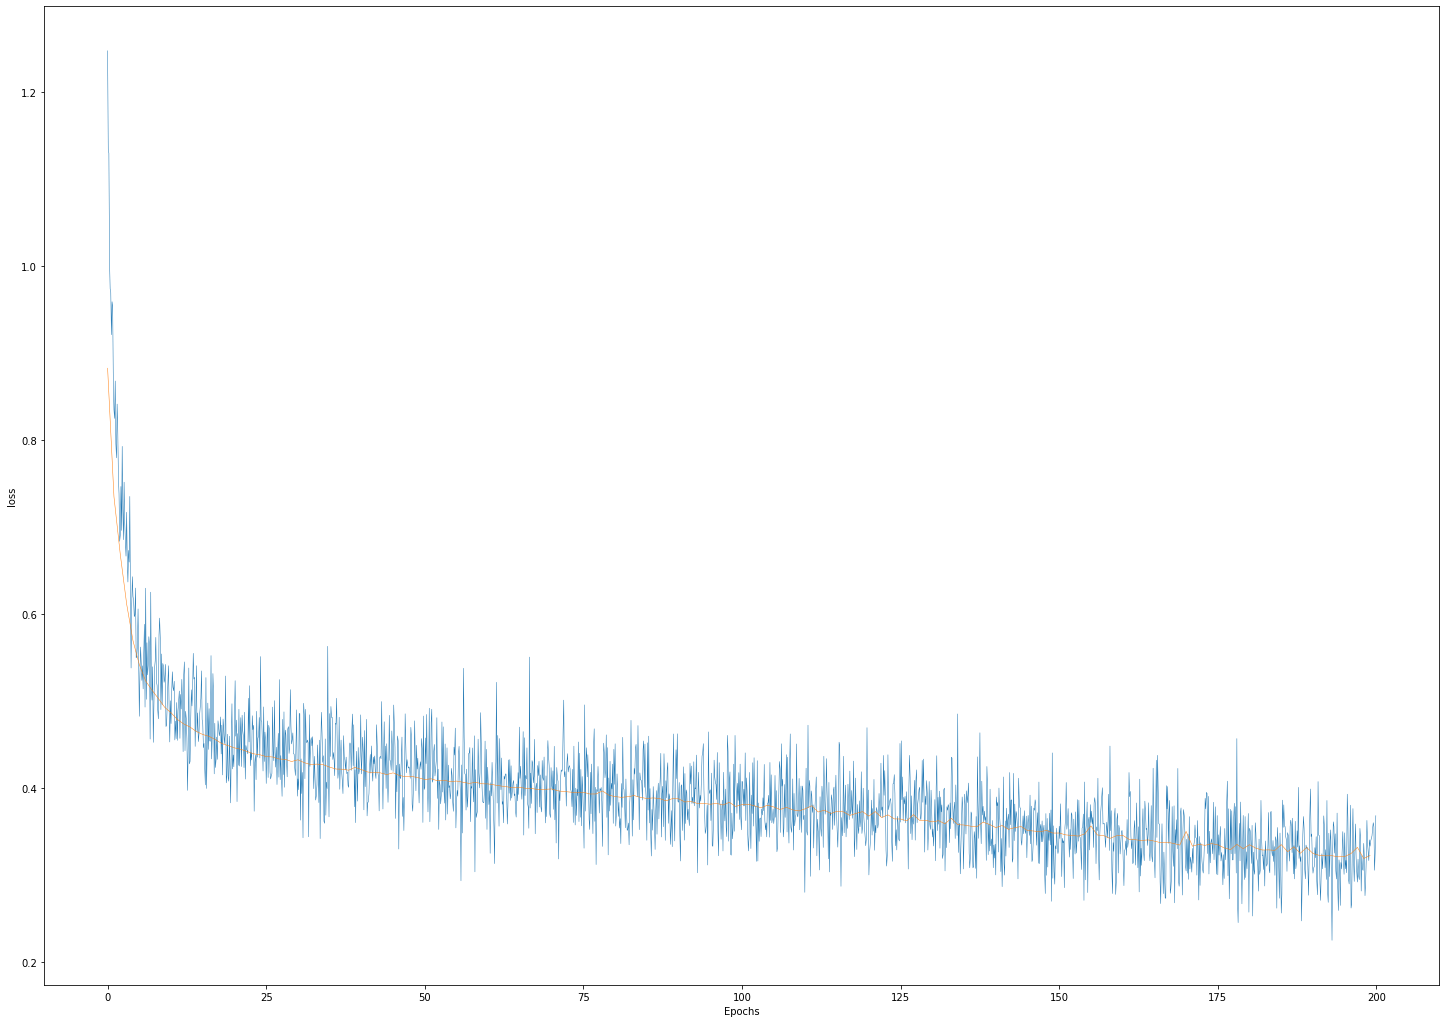

In [20]:
plot_loss(m16)

In [21]:
m16.tb.close()

In [22]:
#torch.save(m16.model.model, "models_and_losses/DNN_128-64_bs-300_lr-0.0001_ReLU.pt")

## Batch size 300 + learning rate 1e-3,1e-4 + ReLU

In [23]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [24]:
model17 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ReLU(), dropout=False)

In [25]:
optimizer= torch.optim.Adam(model17.parameters(), lr=1e-3)

In [26]:
m17 = Trainer(
        model=model17,
        optimizer=optimizer,
        loss_function=nn.CrossEntropyLoss(),
        scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[100], gamma=0.1),
        tensorboard=True,
        model_name="DNN_128-64_bs-300_lr-{0.001,0.0001}_ReLU",
        verbose=True
        )

cuda:0


In [27]:
lh = m17(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.7363, validation_loss:0.5432, val_accuracy:0.7924
Epoch [2/200], average_loss:0.5194, validation_loss:0.4897, val_accuracy:0.7839
Epoch [3/200], average_loss:0.4963, validation_loss:0.4729, val_accuracy:0.8051
Epoch [4/200], average_loss:0.4777, validation_loss:0.4671, val_accuracy:0.7669
Epoch [5/200], average_loss:0.4597, validation_loss:0.4430, val_accuracy:0.8136
Epoch [6/200], average_loss:0.4500, validation_loss:0.4489, val_accuracy:0.8220
Epoch [7/200], average_loss:0.4443, validation_loss:0.4688, val_accuracy:0.8008
Epoch [8/200], average_loss:0.4398, validation_loss:0.4396, val_accuracy:0.8051
Epoch [9/200], average_loss:0.4314, validation_loss:0.4171, val_accuracy:0.8178
Epoch [10/200], average_loss:0.4261, validation_loss:0.4530, val_accuracy:0.8093
Epoch [11/200], average_loss:0.4223, validation_loss:0.4063, val_accuracy:0.8686
Epoch [12/200], average_loss:0.4149, validation_loss:0.4355, val_accuracy:0.8051
Epoch [13/200], average_loss:0.4119, 

Epoch [103/200], average_loss:0.2153, validation_loss:0.2440, val_accuracy:0.8983
Epoch [104/200], average_loss:0.2142, validation_loss:0.2429, val_accuracy:0.9407
Epoch [105/200], average_loss:0.2140, validation_loss:0.2444, val_accuracy:0.8898
Epoch [106/200], average_loss:0.2134, validation_loss:0.2442, val_accuracy:0.8983
Epoch [107/200], average_loss:0.2131, validation_loss:0.2431, val_accuracy:0.9153
Epoch [108/200], average_loss:0.2133, validation_loss:0.2426, val_accuracy:0.9068
Epoch [109/200], average_loss:0.2129, validation_loss:0.2437, val_accuracy:0.8983
Epoch [110/200], average_loss:0.2123, validation_loss:0.2441, val_accuracy:0.9025
Epoch [111/200], average_loss:0.2121, validation_loss:0.2427, val_accuracy:0.9068
Epoch [112/200], average_loss:0.2120, validation_loss:0.2426, val_accuracy:0.9068
Epoch [113/200], average_loss:0.2125, validation_loss:0.2445, val_accuracy:0.8983
Epoch [114/200], average_loss:0.2126, validation_loss:0.2432, val_accuracy:0.9153
Epoch [115/200],

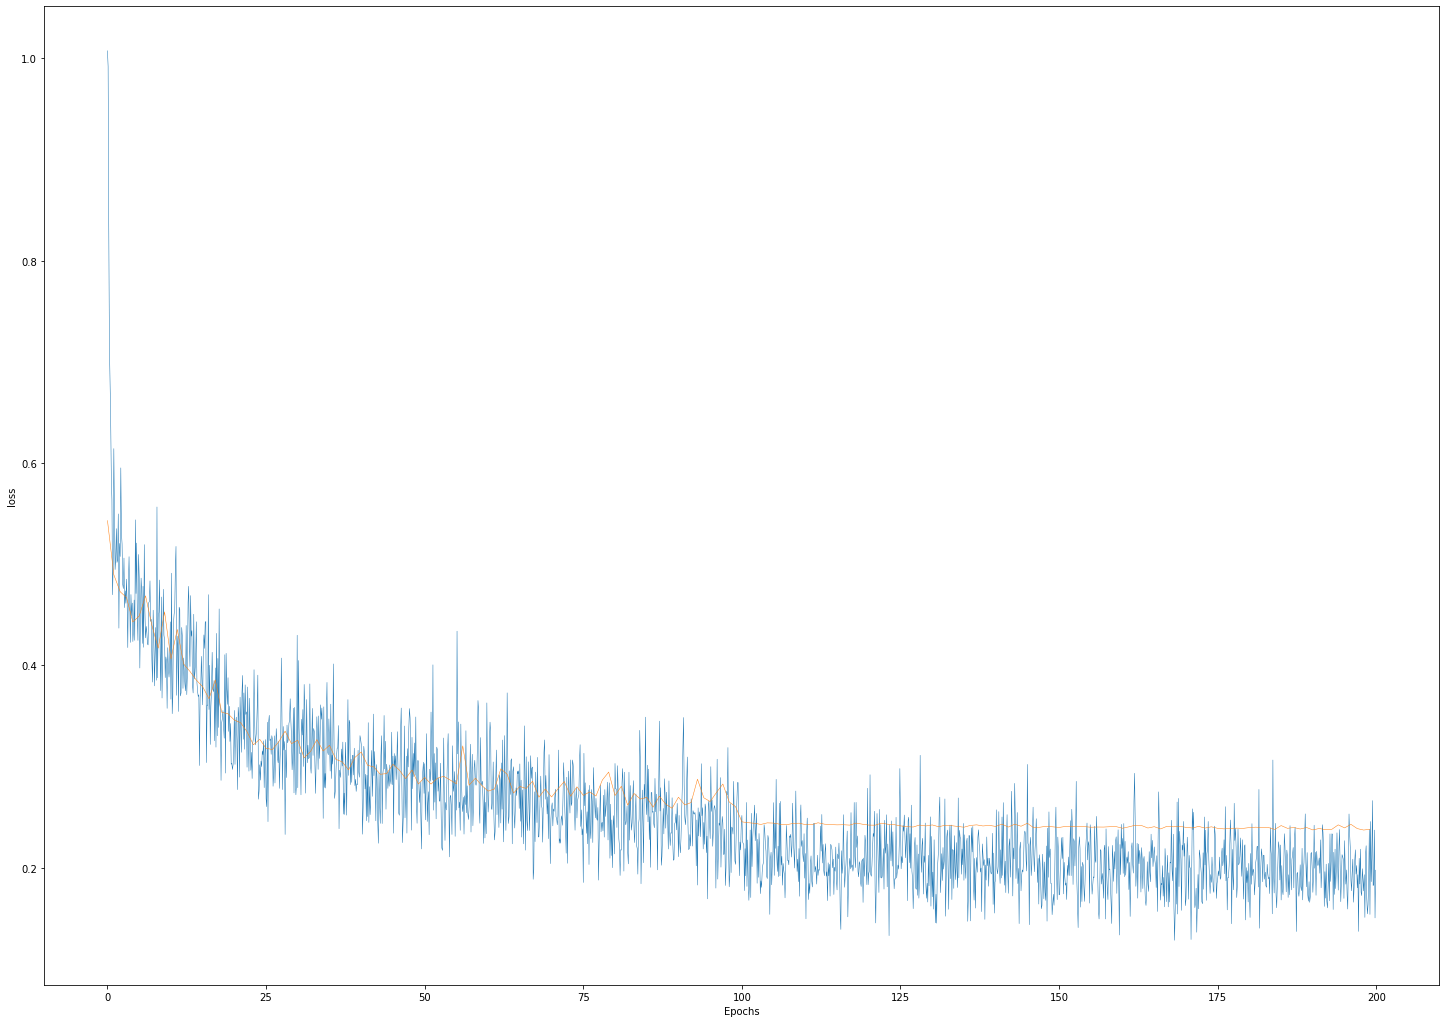

In [28]:
plot_loss(m17)

In [29]:
m17.tb.close()

In [30]:
#torch.save(m17.model.model, "models_and_losses/DNN_128-64_bs-300_lr-{0.001,0.0001}_ReLU.pt")

## Batch size 300 + learning rate 1e-3 + ELU

In [31]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

In [32]:
model18 = DNN(n_layers=2, neurons=[160, 128, 64], output_dim=4, activation=nn.ELU(), dropout=False)

In [33]:
m18 = Trainer(
        model=model18,
        optimizer=torch.optim.Adam(model18.parameters(), lr=1e-3),
        loss_function=nn.CrossEntropyLoss(),
        tensorboard=True,
        model_name="DNN_128-64_bs-300_lr-0.001_ELU",
        verbose=True
        )

cuda:0


In [ ]:
lh = m18(epochs=200, train_loader=train_loader, validation_loader=test_loader)

Epoch [1/200], average_loss:0.6819, validation_loss:0.5385, val_accuracy:0.8093
Epoch [2/200], average_loss:0.5328, validation_loss:0.5060, val_accuracy:0.7542
Epoch [3/200], average_loss:0.5141, validation_loss:0.5257, val_accuracy:0.7966
Epoch [4/200], average_loss:0.4996, validation_loss:0.4780, val_accuracy:0.8263
Epoch [5/200], average_loss:0.4869, validation_loss:0.5209, val_accuracy:0.7797
Epoch [6/200], average_loss:0.4777, validation_loss:0.4662, val_accuracy:0.7542
Epoch [7/200], average_loss:0.4681, validation_loss:0.4509, val_accuracy:0.8178
Epoch [8/200], average_loss:0.4605, validation_loss:0.4489, val_accuracy:0.8432
Epoch [9/200], average_loss:0.4565, validation_loss:0.4466, val_accuracy:0.8432
Epoch [10/200], average_loss:0.4488, validation_loss:0.4365, val_accuracy:0.7881
Epoch [11/200], average_loss:0.4501, validation_loss:0.4378, val_accuracy:0.7669
Epoch [12/200], average_loss:0.4414, validation_loss:0.4312, val_accuracy:0.8771
Epoch [13/200], average_loss:0.4361, 

In [ ]:
plot_loss(m18)

In [ ]:
m18.tb.close()

In [15]:
#torch.save(m18.model.model, "models_and_losses/DNN_128-64_bs-300_lr-0.001_ELU.pt")

C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LinearBlock. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ghost_000\Miniconda3\envs\Pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upo